In [13]:
# Settings
##필요한 설정들 
options(warn = -1) ## 경고 지우기
options(repr.plot.width=8, repr.plot.height=6) # 플랏 크기 조절
Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8") # 한글 설정
library(stringr) # stringr 불러오기
library(dplyr) # dplyr 불러오기
library(plotrix) # 3D pie
library(RColorBrewer) # color package
library(tidyverse)
library(hrbrthemes)
library(kableExtra)
#library(extrafont)

#Functions

checkData <- function(data){
		options(repr.plot.width=8, repr.plot.height=6) # 플랏 크기 조절
    par(family ="AppleGothic",bg='grey') # 그래프 배경및 한글설정
    
    cat("*****************(1.DATA HEAD)*****************\n\n");
        print(head(data,2))
    cat("******************************************************************\n\n");
    cat("*****************(2.DATA TAIL)*****************\n\n");
        print(tail(data,2))
    cat("******************************************************************\n\n");
    cat("*****************(3.DATA Structure)*****************\n\n");
        str(data)
    cat("******************************************************************\n\n");
    # data 의 기본 통계량 보기
    cat("*****************(4.DATA Summary)*****************\n\n");
        print(summary(data))
    cat("******************************************************************\n\n");
    cat("*****************(5.NA check)*****************\n\n");
        cat(" 5.1 Data 전체에서의 NA 개수:", sum(is.na(data)),"\n\n")
        # 컬럼 별 na 확인
        cat(" 5.2 Column 별 NA check \n")
        for(i in 1:ncol(data)){
            cat("  col[",colnames(data[i]), "] --> NA 개수:",(sum(is.na(data[,i]))),"\n")
        }
        ## 컬럼별 na 합계 계산. 
        cat("column 별 na 합계 \n",colSums(is.na(data)) ,"\n")
    cat("******************************************************************\n\n");
    cat("*****************(6.Colum 별 data 빈도수 형평성 검사)*****************\n\n");
    #A 컬럼의 최대값 최소값 빈도수
    for(i in 1:ncol(data)){
        #cat("-----",colnames(data)[i] ," 컬럼의 빈도 분석결과----- \n")
        cat("최빈값:",max(table(data[,i])), "최소빈도값 :", min(table(data[,i])), "\n")
        barplot(table(data[,i]),

            main = paste(colnames(data)[i] ," 컬럼의 데이터 별 빈도 분석 \n"),
            ylab = "빈도수",
            xlab = "데이터값",
        )
        
        cat("\n")
        # 각 컬럼의 빈도수의 최대값, 최소값 구하기 
        cat(colnames(data)[i],"컬럼의 빈도수의 최대값과 최소값\n")
    }
}

# 2. 결측치 보상 함수 
replaceNa <-function(data){
    #data 는 vector 

    # 결측치를 무조건 제거하면 통계량을 얻을수 없으며, 데이터 손실로 문제 발생
    # 1)결측치를 제거하고 평균구하기
    meanDeleteNa <-mean(data,na.rm = T)
    cat( " >> 결측치를 제거후 평균 : ", meanDeleteNa)

    # 2) NA를 0 으로 대체하여 평균구해보기 
    meanRepZero <-mean(ifelse(is.na(data),0,data))
    cat( "\n >> 결측치를 0으로 대체후 평균 : ", meanRepZero)

    # 3) NA 를 중앙값으로 대체하여 평균구해보기
    meanRepMedian <- mean(ifelse(is.na(data),median(data,na.rm = T),data))
    cat("\n >> 결측치를 중앙값(", median(data,na.rm = T),")으로 대체후 평균: ", meanRepMedian,sep="" )

    # 4) NA 를 최소값으로 대체하여 평균 구해보기
    meanRepMin <- mean(ifelse(is.na(data), min(data,na.rm = T),data))
    cat("\n >> 결측치를 최소값(",min(data,na.rm = T), ")으로 대체후 평균 : ",meanRepMin,sep="" )

    meanRepMax <- mean(ifelse(is.na(data), max(data,na.rm = T),data))
    cat("\n >> 결측치를 최대값(",max(data,na.rm = T), ")으로 대체후 평균 : ",meanRepMax,sep="" )
    
    meanRep1Qt <-mean(ifelse(is.na(data), quantile(data,0.25,na.rm = T),data))
    cat("\n >> 결측치를 1사분위(",quantile(data,0.25,na.rm = T), ")으로 대체후 평균 : ",meanRep1Qt,sep="" )

    meanRep2Qt <-mean(ifelse(is.na(data), quantile(data,0.5,na.rm = T),data))
    cat("\n >> 결측치를 2사분위(",quantile(data,0.5,na.rm = T), ")으로 대체후 평균 : ",meanRep2Qt,sep="" )

    meanRep3Qt <-mean(ifelse(is.na(data), quantile(data,0.75,na.rm = T),data))
    cat("\n >> 결측치를 3사분위(",quantile(data,0.75,na.rm = T), ")으로 대체후 평균 : ",meanRep3Qt,sep="" )

    meanRep4Qt <-mean(ifelse(is.na(data), quantile(data,1,na.rm = T),data))
    cat("\n >> 결측치를 4사분위(",quantile(data,1,na.rm = T), ")으로 대체후 평균 : ",meanRep4Qt,sep="" )
    
    ## 최적 결측치 대체 값 계산
    meanReps<-c(meanRep1Qt,meanRep2Qt,meanRep3Qt,meanRep4Qt,meanRepMax,meanRepMin,meanRepMedian,meanRepZero)
    names(meanReps)<-c("1사분위","2사분위","3사분위","4사분위","최대값","최소값","중앙값","0")
    minimum_meanReps<-min(abs(meanReps-mean(data,na.rm = T)))
    meanRepOptimum <-sum(ifelse(abs(meanReps-mean(data,na.rm = T)) == minimum_meanReps,meanReps,0))
    cat ("\n")
    meanRepOptName<-names(meanReps)[which(meanReps== meanRepOptimum)]
    cat("\n >> 최적 대체 => ",meanRepOptName ,"(",meanRepOptimum ,")")
}


# 3. Correlation and Regression Line fitting
corPlot<- function(X,Y,xylab){

		# Description : 상관관계 및 회귀선 plot 
		# Author : PDG
		# Update : 2024.03.16
    Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8") # 한글 설정
    par(family ="AppleGothic",bg='white')
    options(warn =-1,
        repr.plot.width = 10,
        repr.plot.height = 10
        )
    # X,Y 는 vector 임
    plot(Y~X, 
        main =paste("Regression Line : ", xylab[2],"~",xylab[1]),
        xlab = xylab[1],
        ylab = xylab[2]
    )
    regline <- lm(Y~X);regline # fitting liner
    abline(regline,col ="red",lwd =3)
    
    # 상관관계 
    if( round(cor(X,Y),2) > 0.7){
            relation <- "강한 관계"
        }else if(round(cor(X,Y),2)>0.5){
            relation <- "일반 관계"
        }else if (round(cor(X,Y),2)>0.3){
            relation <- "약한 관계"
        }else{
            relation <- "관계 없음"
        }
    
    text(   max(X)%/%3, max(Y)%/%7*6,
            paste(
            "상관계수:",round(cor(X,Y),2), "(",relation  , ")","\n",
            "Y = ",round(coefficients(regline)[2],2)," * X",
            "  + ",round(coefficients(regline)[1],2)
            )
            , sep ="" ,col = "red", cex =1.2)
    summary(regline) 
}

#replaceNa(data)
#checkData(data)
#corPlot(seoul$`발생건수`,seoul$`부상자수`, c("발생건수","부상자수 "))

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

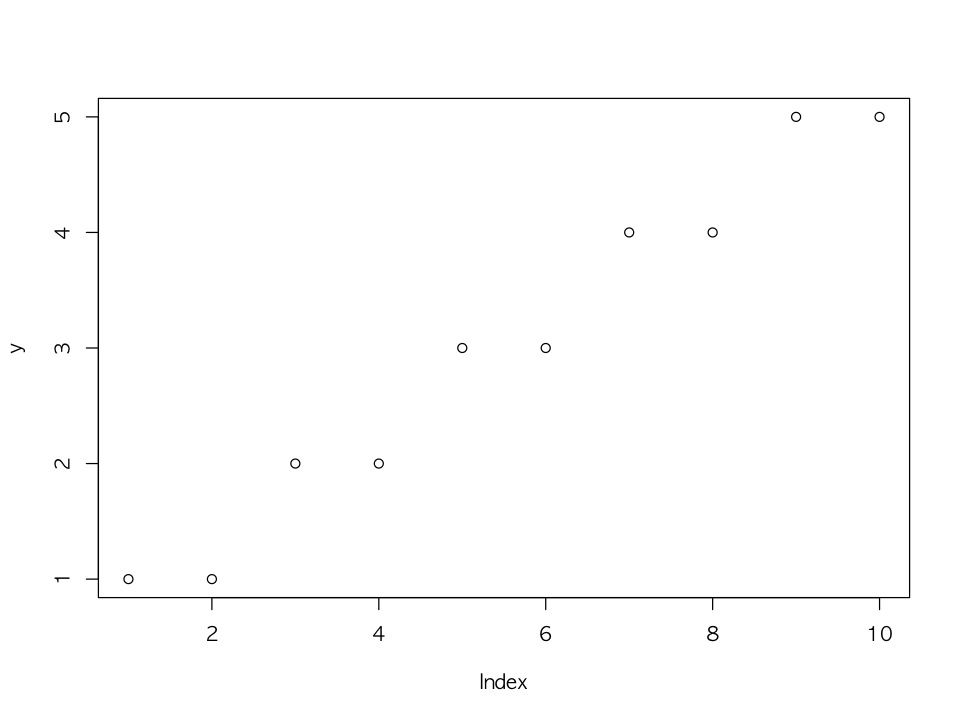

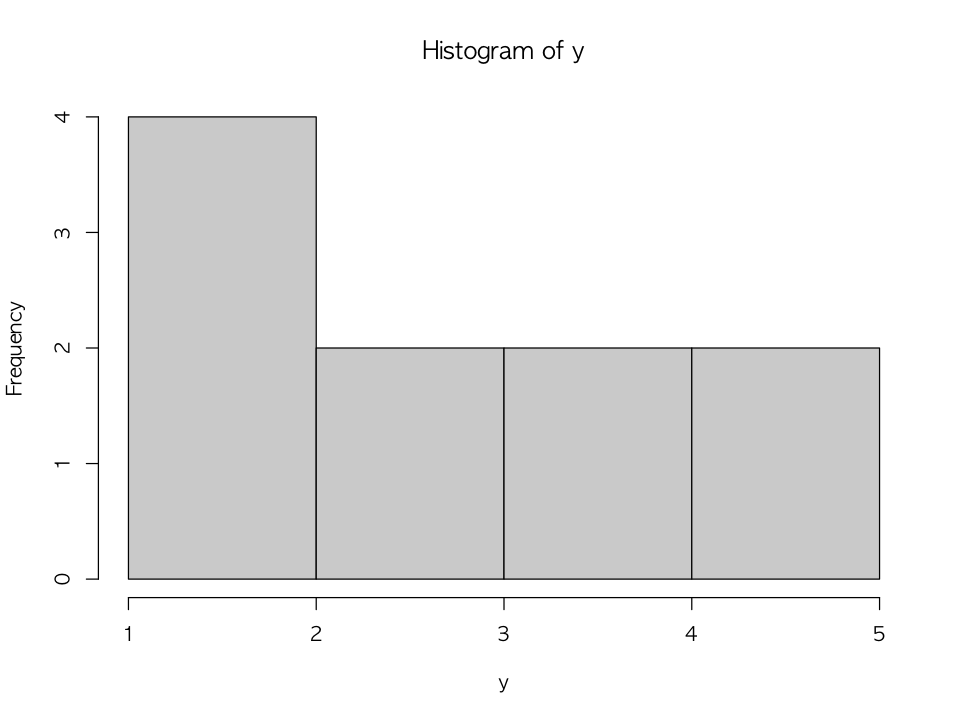

In [4]:
# 산점도 
par(family ="AppleGothic",bg='white')
y<-c(1,1,2,2,3,3,4,4,5,5)
plot(y)
hist(y)

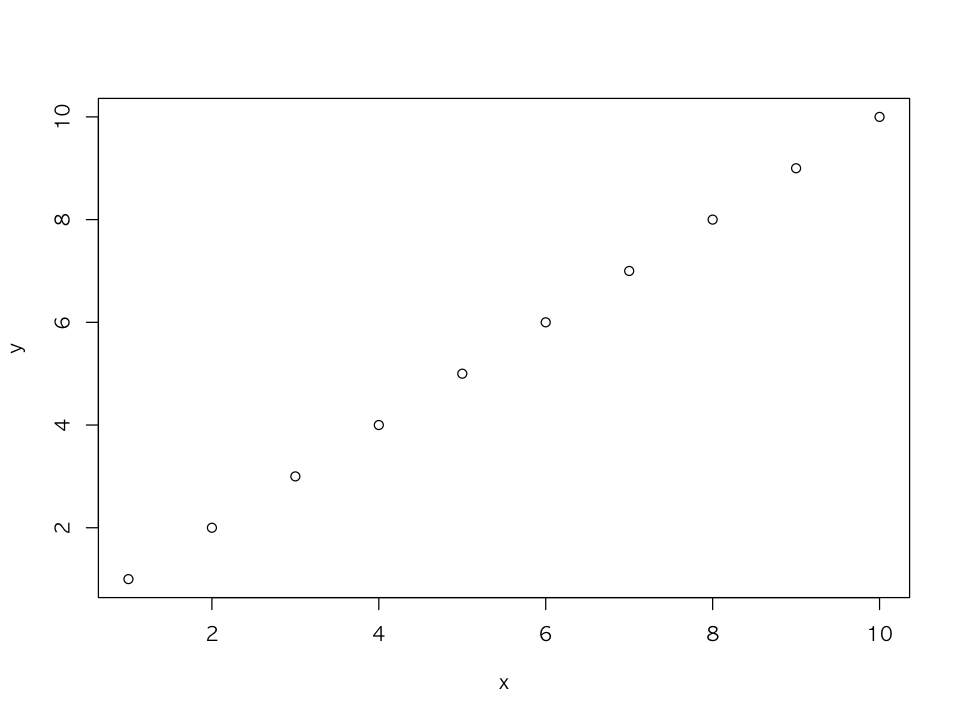

In [5]:
par(family ="AppleGothic",bg='white')
x <- 1:10
y <- 1:10
plot(x,y) #== plot(x~y)


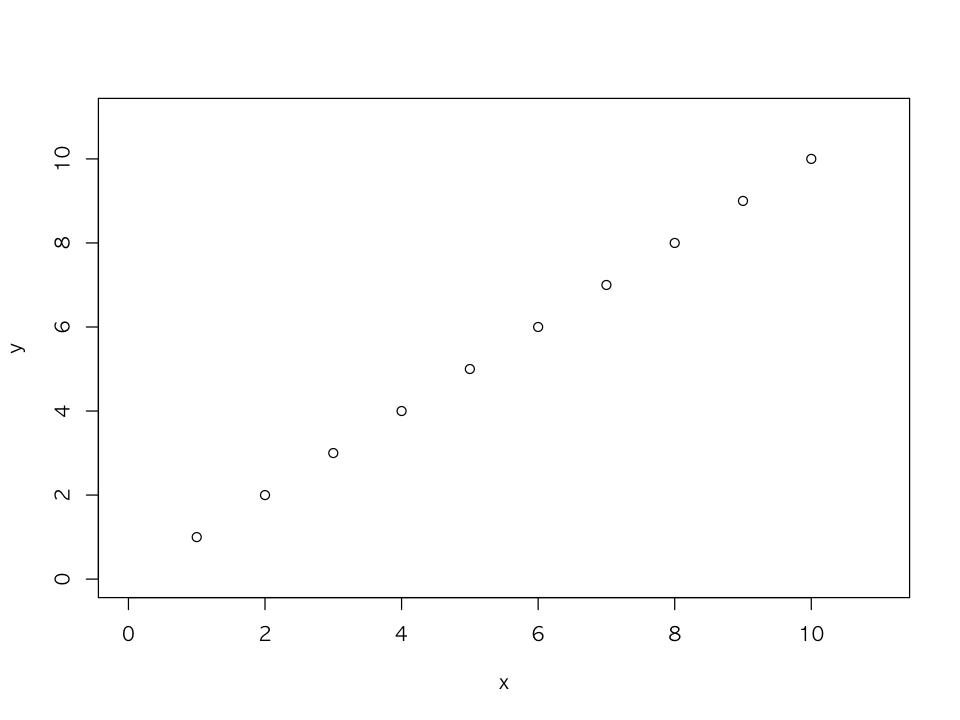

In [6]:
par(family ="AppleGothic",bg='white')
x <- 1:10
y <- 1:10
plot(x,y,
    # 데이터를 안쪽으로 모아라. 
    xlim = c(0,11),
    ylim = c(0,11)
    )

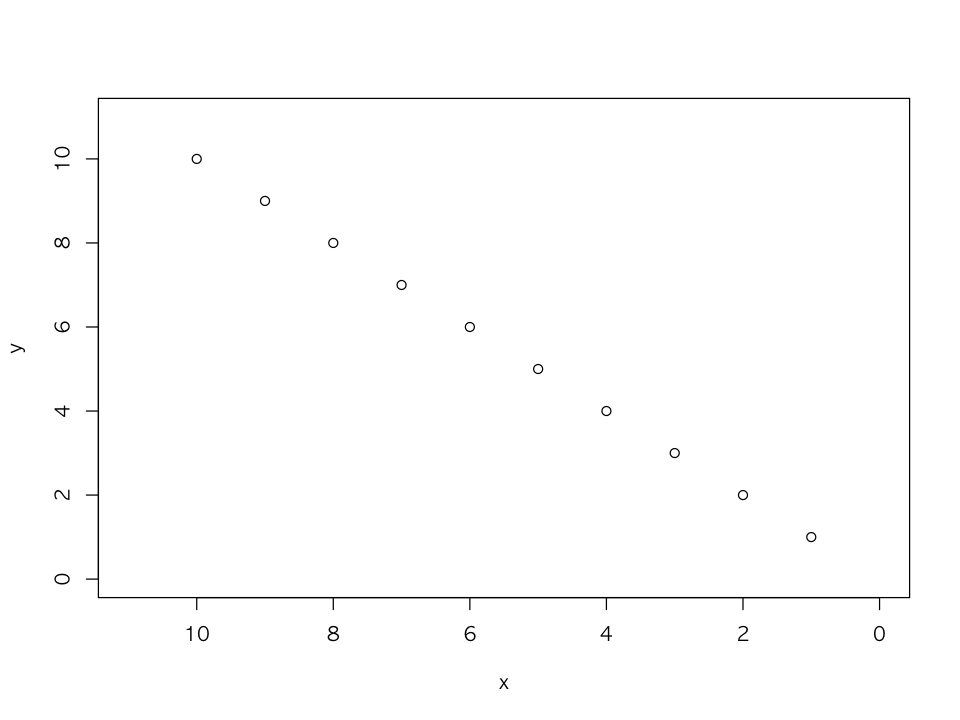

In [7]:
par(family ="AppleGothic",bg='white')
x <- 1:10
y <- 1:10
plot(x,y,
    # 데이터를 안쪽으로 모아라. 
    xlim = c(11,0),
    ylim = c(0,11)
    )

In [8]:
seoul<-read.csv("../Data/newSeoul2019.csv"); head(seoul)

sum(is.na(seoul))
table(seoul$`년도`)
t1<-0
for(i in colnames(seoul)){
    append(t1,table(seoul$i))
}
t1

,년도,월,자치구명,발생건수,사망자수,부상자수
,<int>,<int>,<chr>,<int>,<int>,<int>
1,2011,1,종로구,115,2,165
2,2011,2,종로구,99,0,134
3,2011,3,종로구,116,0,162
4,2011,4,종로구,110,1,153
5,2011,5,종로구,122,0,157
6,2011,6,종로구,116,3,163


[1] 0


2011 2012 2013 2014 2015 2016 2017 2018 2019 
 300  300  300  300  300  300  300  300  300 

[1] 0

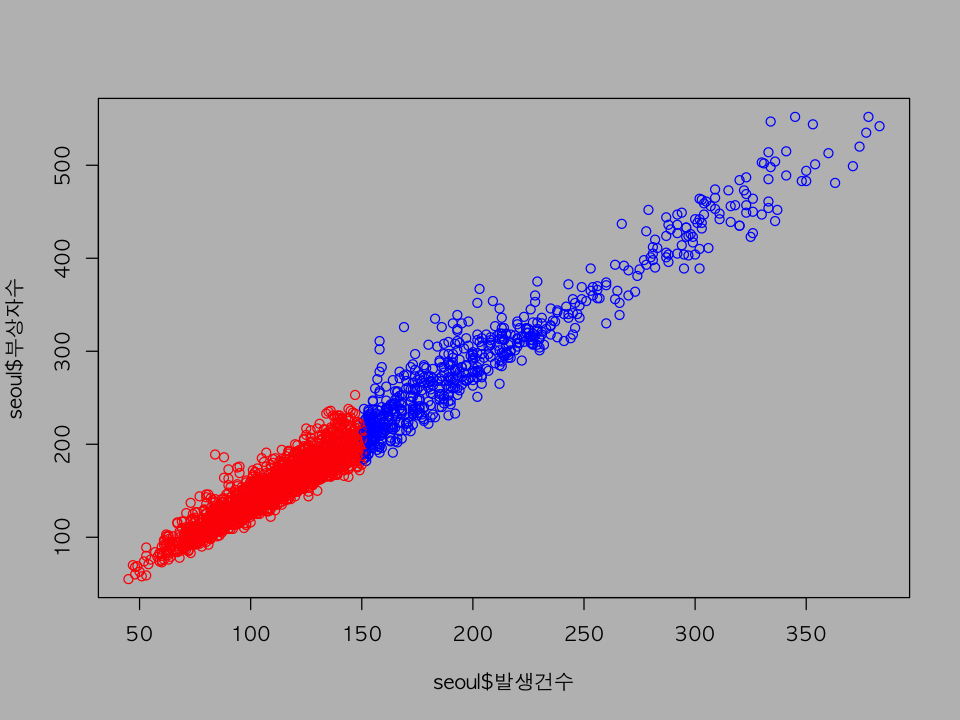

In [9]:
par(family = "AppleGothic", bg = 'Grey')
plot(seoul$`발생건수`,seoul$`부상자수`,

    col = ifelse(seoul$`발생건수`>150,"blue","red")

)

[1] "종로구"   "중구"     "용산구"   "성동구"   "광진구"   "동대문구"
 [7] "중랑구"   "성북구"   "강북구"   "도봉구"   "노원구"   "은평구"  
[13] "서대문구" "마포구"   "양천구"   "강서구"   "구로구"   "금천구"  
[19] "영등포구" "동작구"   "관악구"   "서초구"   "강남구"   "송파구"  
[25] "강동구"

'data.frame':	2700 obs. of  6 variables:
 $ 년도    : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ 월      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 자치구명: chr  "종로구" "종로구" "종로구" "종로구" ...
 $ 발생건수: int  115 99 116 110 122 116 103 122 121 135 ...
 $ 사망자수: int  2 0 0 1 0 3 1 1 2 2 ...
 $ 부상자수: int  165 134 162 153 157 163 154 171 166 193 ...


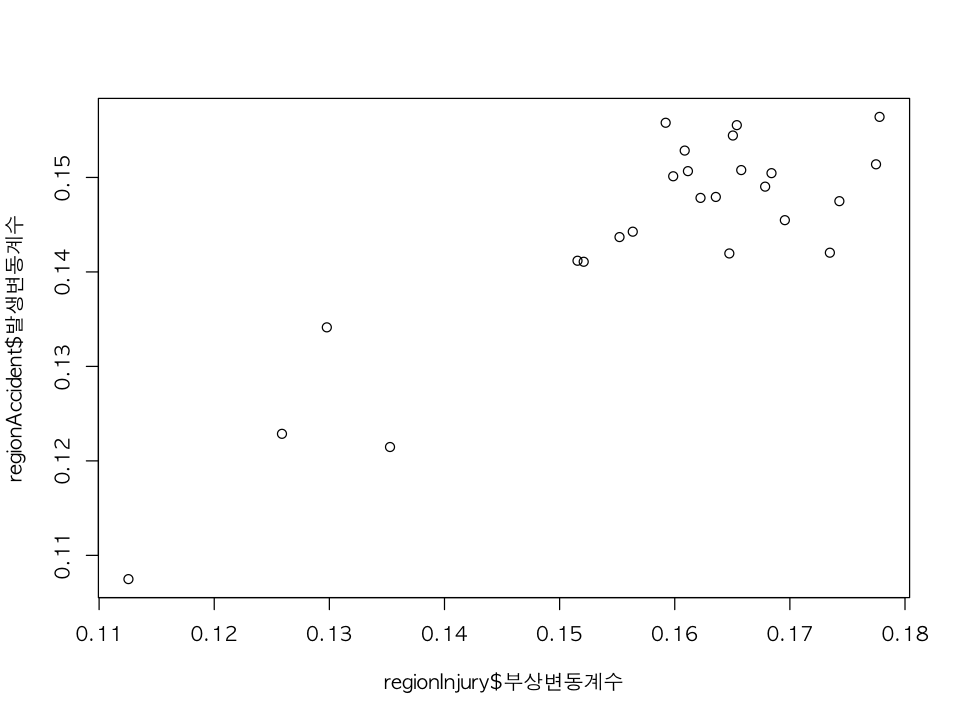


Call:
lm(formula = Y ~ X)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.011815 -0.004982  0.000673  0.004571  0.010908 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.04475    0.01163   3.848 0.000819 ***
X            0.62893    0.07312   8.602 1.21e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.005847 on 23 degrees of freedom
Multiple R-squared:  0.7629,	Adjusted R-squared:  0.7525 
F-statistic: 73.99 on 1 and 23 DF,  p-value: 1.209e-08


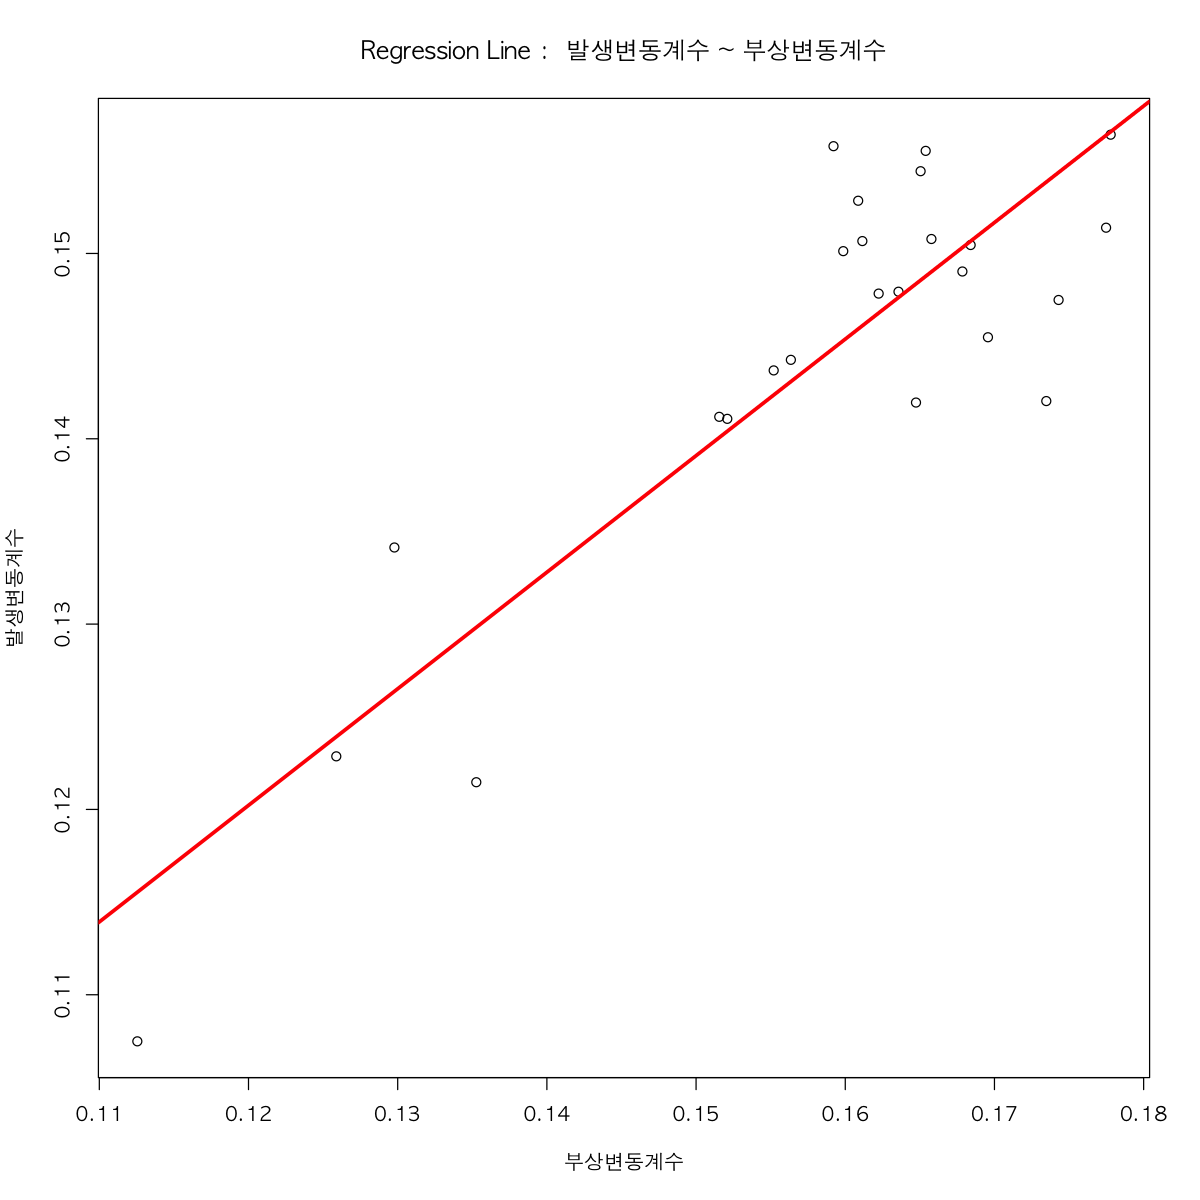

In [14]:
# 발생건수 부상자수, 광진구와 강남구 
unique(seoul$`자치구명`)
#arrange(seoul, desc(부상자수))
str(seoul)

# 지역별 교통사고 부상자수  data frame

regionInjury.mean <- arrange(aggregate(부상자수 ~ 자치구명,seoul, mean),desc(부상자수)) ; #regionInjury.mean
regionInjury.sd <- arrange(aggregate(부상자수 ~ 자치구명,seoul, sd), desc(부상자수)) ; #regionInjury.sd
regionInjury.cv <- regionInjury.sd$부상자수/ regionInjury.mean$부상자수
regionInjury<- data.frame(자치구명=regionInjury.mean$`자치구명`, 부상변동계수 =regionInjury.cv); 
#regionInjury

# 지역별 교통사고 발생건수 data frame
regionAccident.mean <- arrange(aggregate(발생건수 ~ 자치구명,seoul, mean),desc(발생건수)) ; #regionInjury.mean
regionAccident.sd <- arrange(aggregate(발생건수 ~ 자치구명,seoul, sd), desc(발생건수)) ; #regionInjury.sd
regionAccident.cv <- regionAccident.sd$발생건수/ regionAccident.mean$발생건수
regionAccident<- data.frame(자치구명=regionAccident.mean$`자치구명`, 발생변동계수 =regionAccident.cv); 
#regionAccident

par(family = "AppleGothic", bg = "white")
plot(regionInjury$"부상변동계수", regionAccident$"발생변동계수")


corPlot(regionInjury$"부상변동계수", regionAccident$"발생변동계수",c("부상변동계수","발생변동계수"))


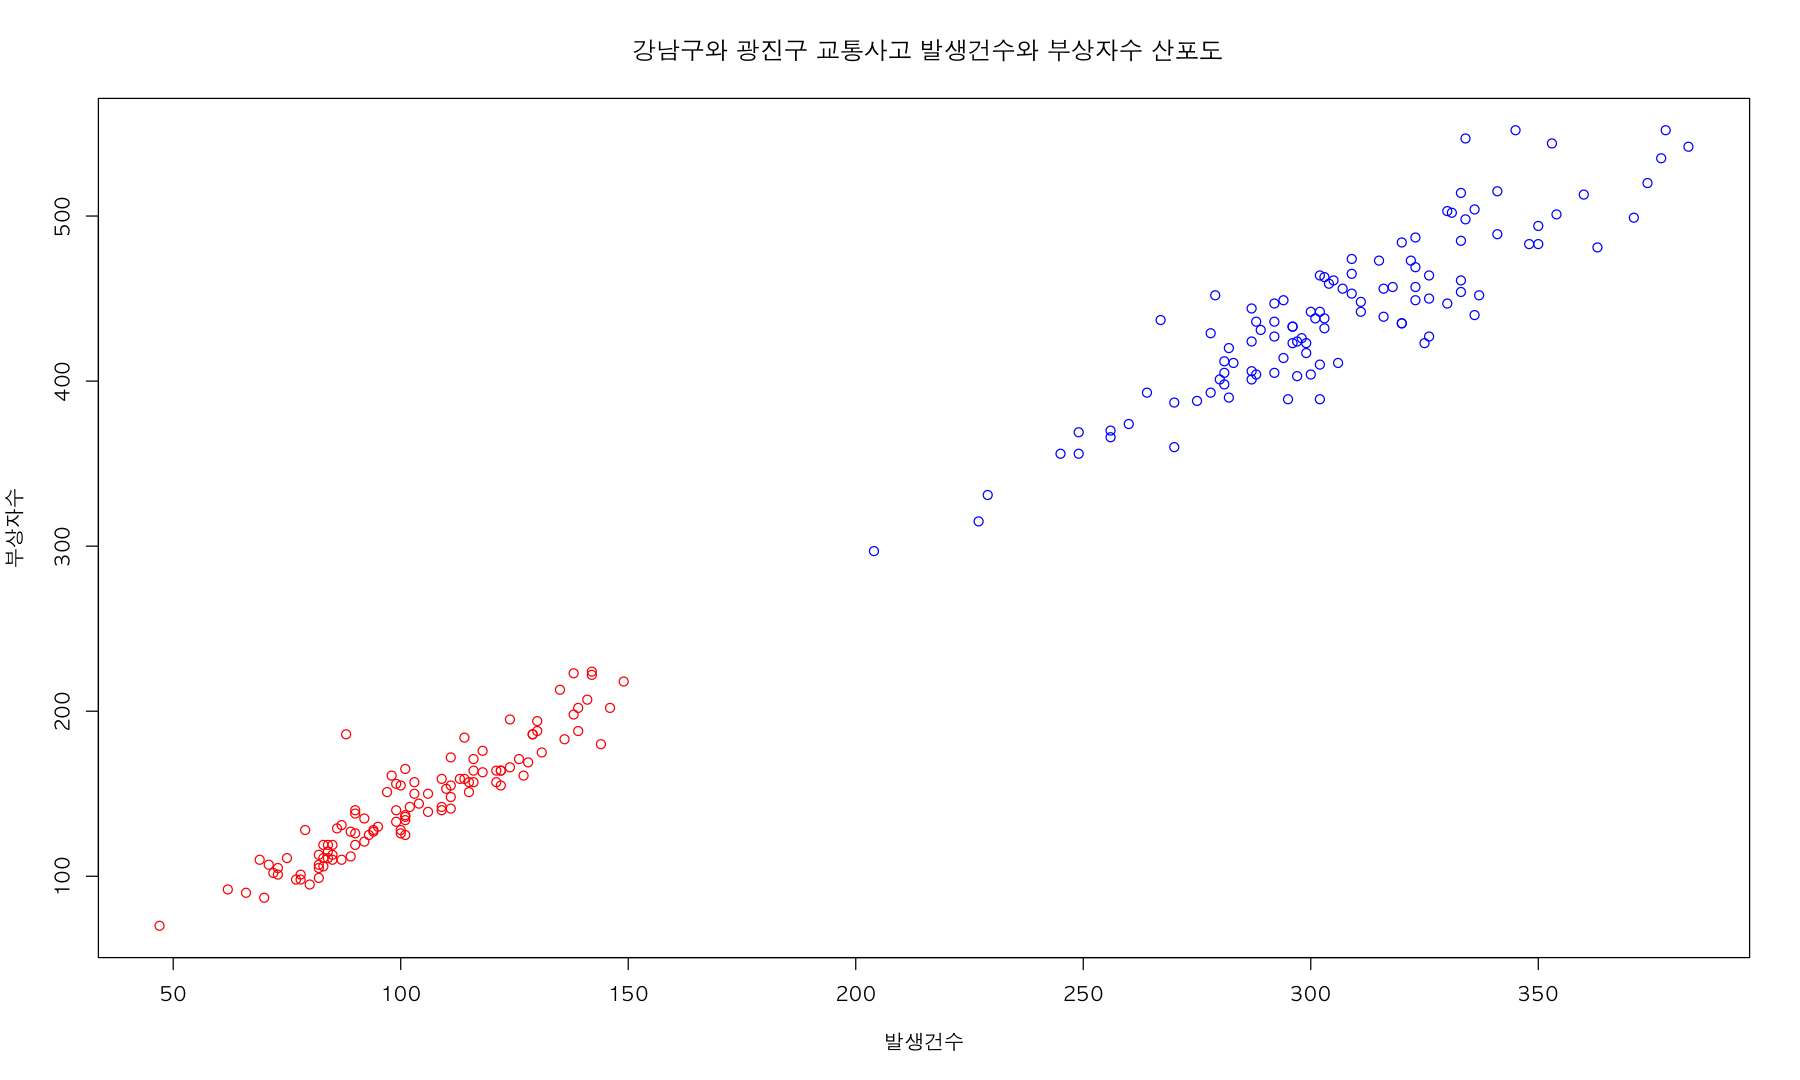

In [ ]:
# 강남구와 광진구 교통사고 발생건수와 부상자수 산포도
gangNam <-subset(seoul, 자치구명 =="강남구")
gwangJin <-subset(seoul, 자치구명 =="광진구")
result <- data.frame( 자치구명 =c(gangNam$`자치구명`,gwangJin$자치구명)
                    , 발생건수 =c(gangNam$`발생건수`,gwangJin$발생건수)  
                    , 부상자수 =c(gangNam$`부상자수`,gwangJin$부상자수))
# Plotting
par(family = "AppleGothic", bg= 'white')
plot(result$발생건수, result$부상자수,
    col = ifelse(result$자치구명 =="강남구","blue","red"),
    main = " 강남구와 광진구 교통사고 발생건수와 부상자수 산포도",
    ylab = "부상자수", # x axis 이름
    xlab = "발생건수",
    )
#plot(seoul$`발생건수`,seoul$부상자수)


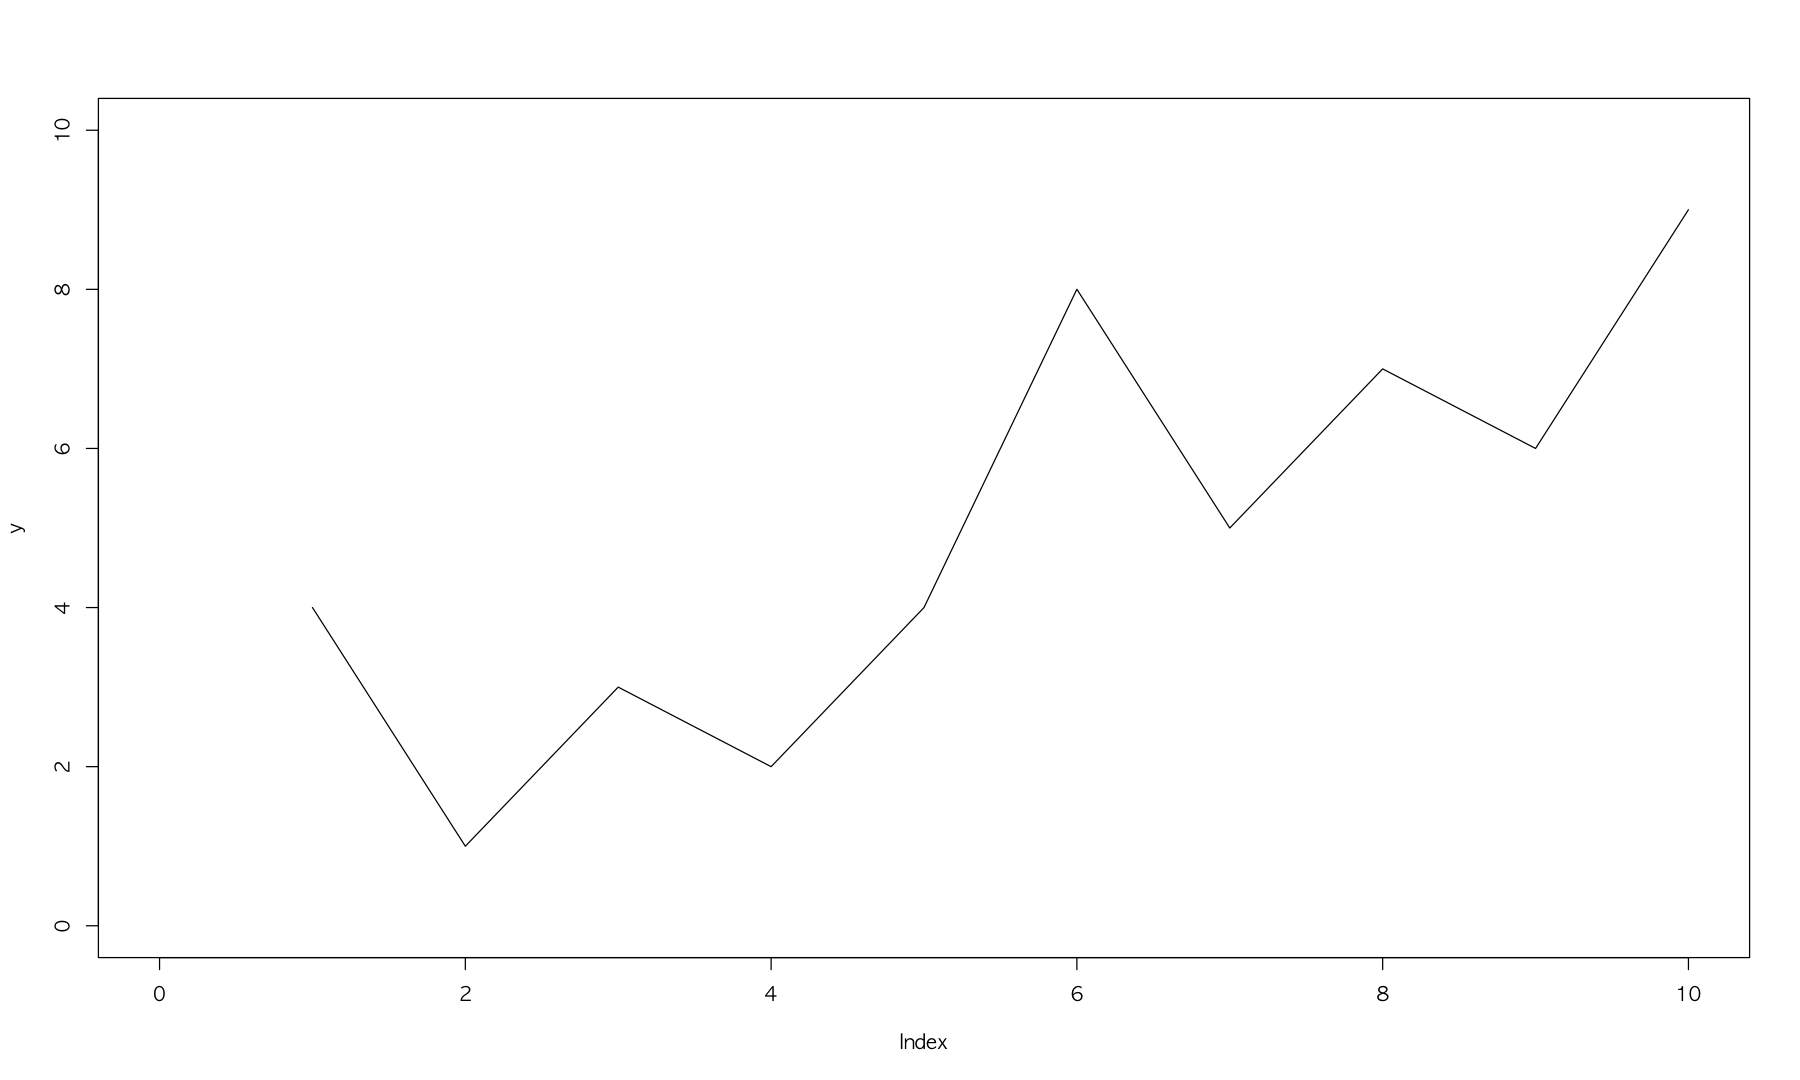

In [ ]:
# main title
par(family="AppleGothic" , bg = 'white')
y <- c(4,1,3,2,4,8,5,7,6,9)
plot(y,
        xlim= c(min(y)-1, max(y)+1),
        ylim= c(min(y)-1, max(y)+1),
        type= "l")

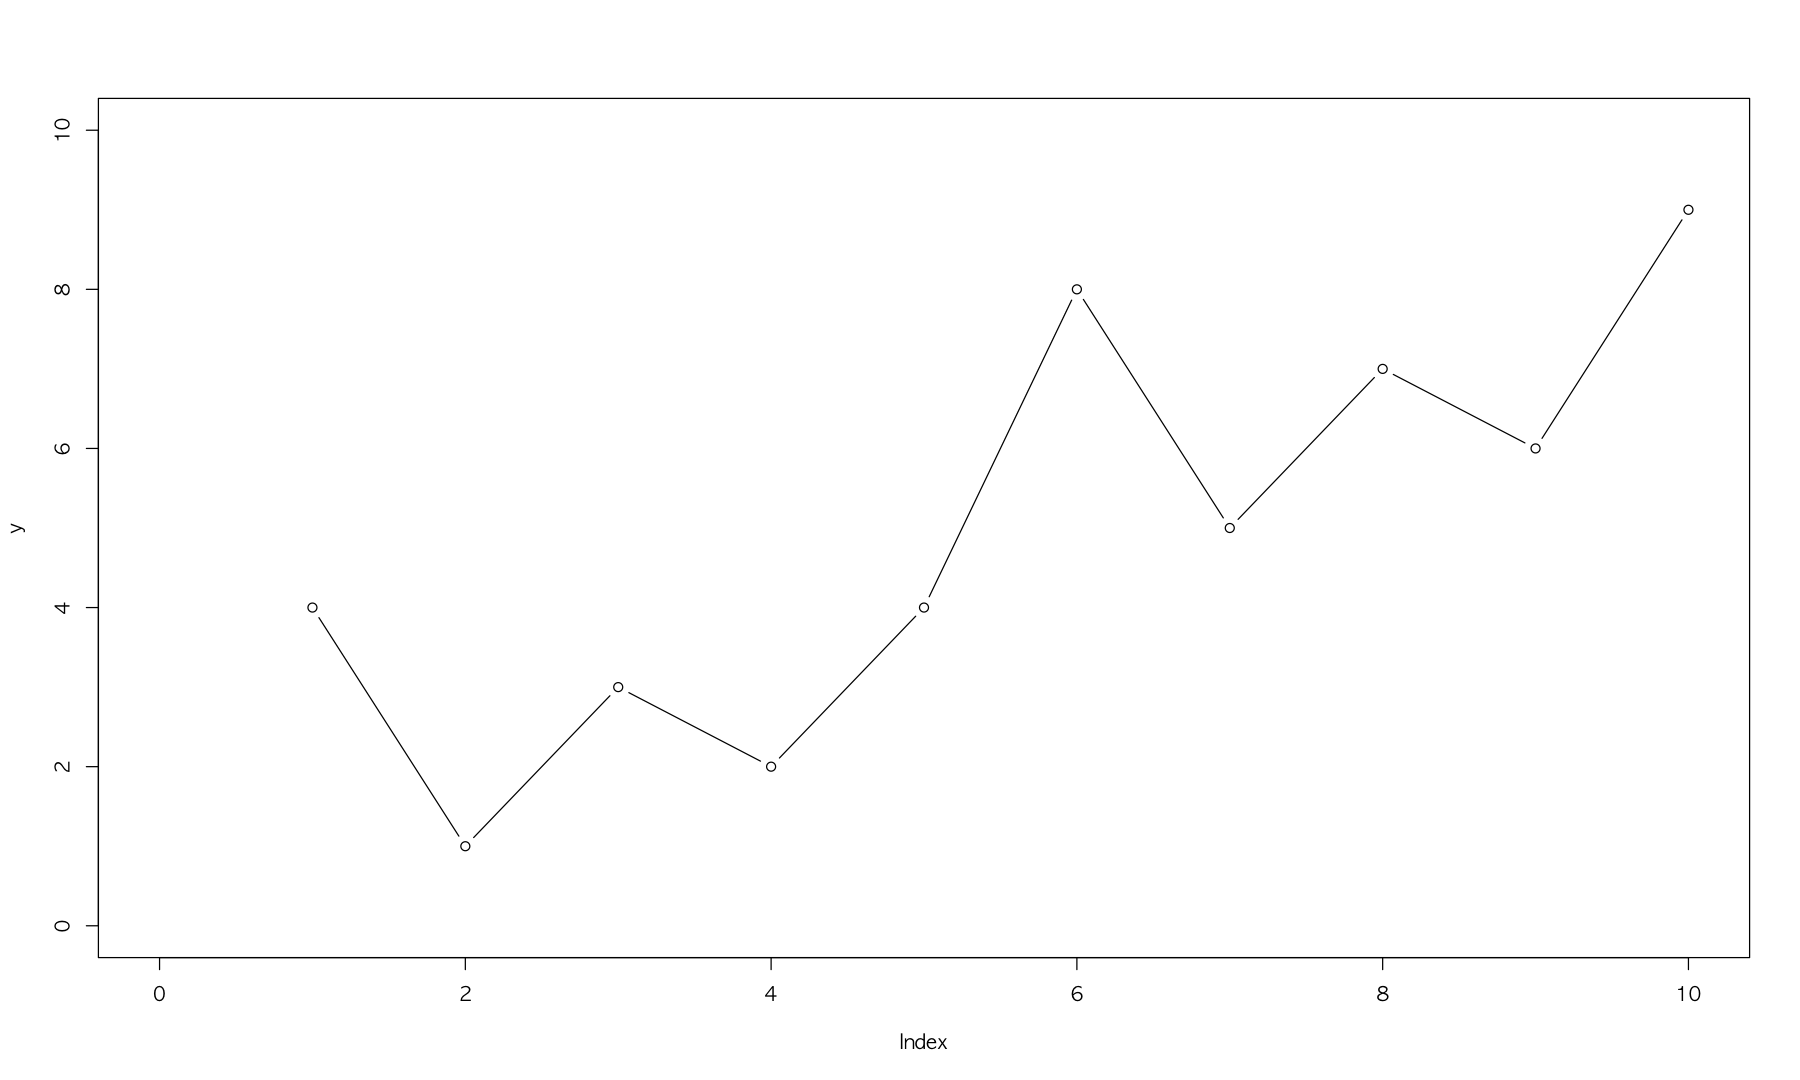

In [ ]:
# 점과 꺽은선 그래프
par(family="AppleGothic" , bg = 'white')
y <- c(4,1,3,2,4,8,5,7,6,9)
plot(y,
        xlim= c(min(y)-1, max(y)+1),
        ylim= c(min(y)-1, max(y)+1),
        type= "b" #추세+ 데이터 => both
        )

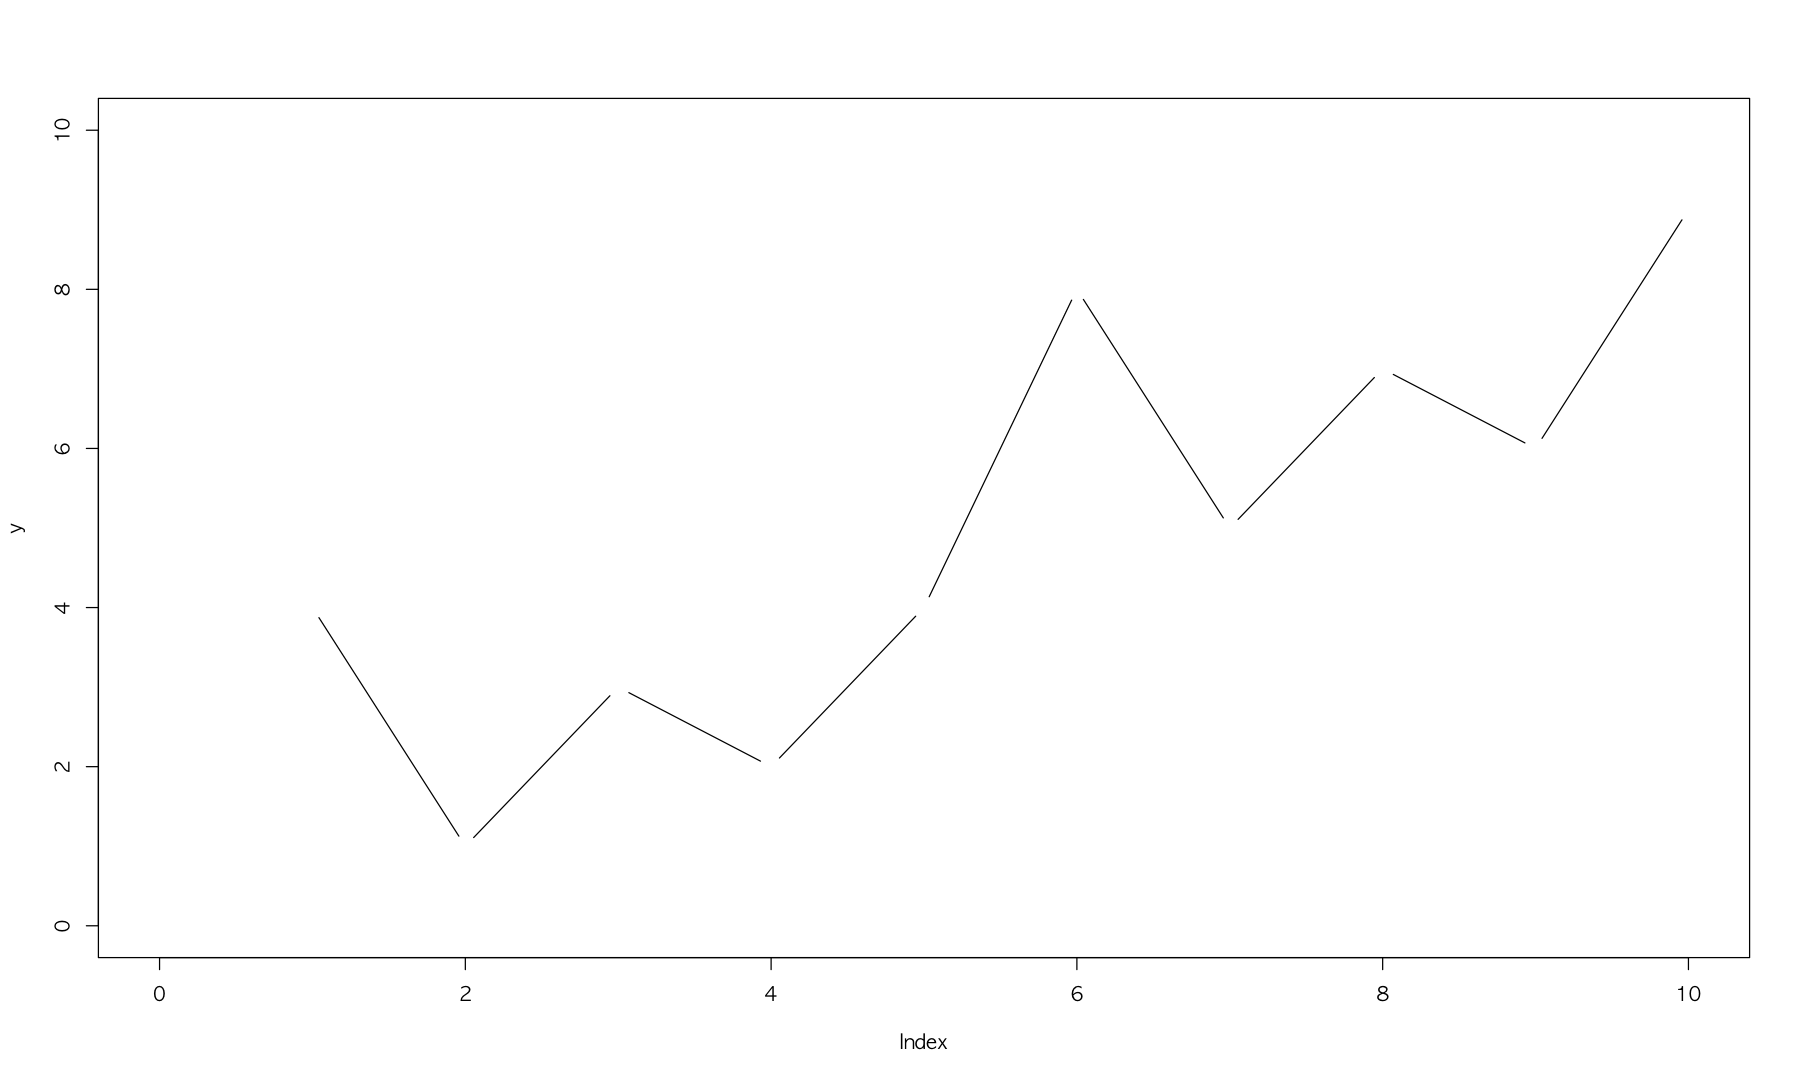

In [ ]:
# 점이 없는 꺽은선 그래프
par(family="AppleGothic" , bg = 'white')
y <- c(4,1,3,2,4,8,5,7,6,9)
plot(y,
        xlim= c(min(y)-1, max(y)+1),
        ylim= c(min(y)-1, max(y)+1),
        type= "c" # 수치값이 들어갈때 쓰여짐. 
        )

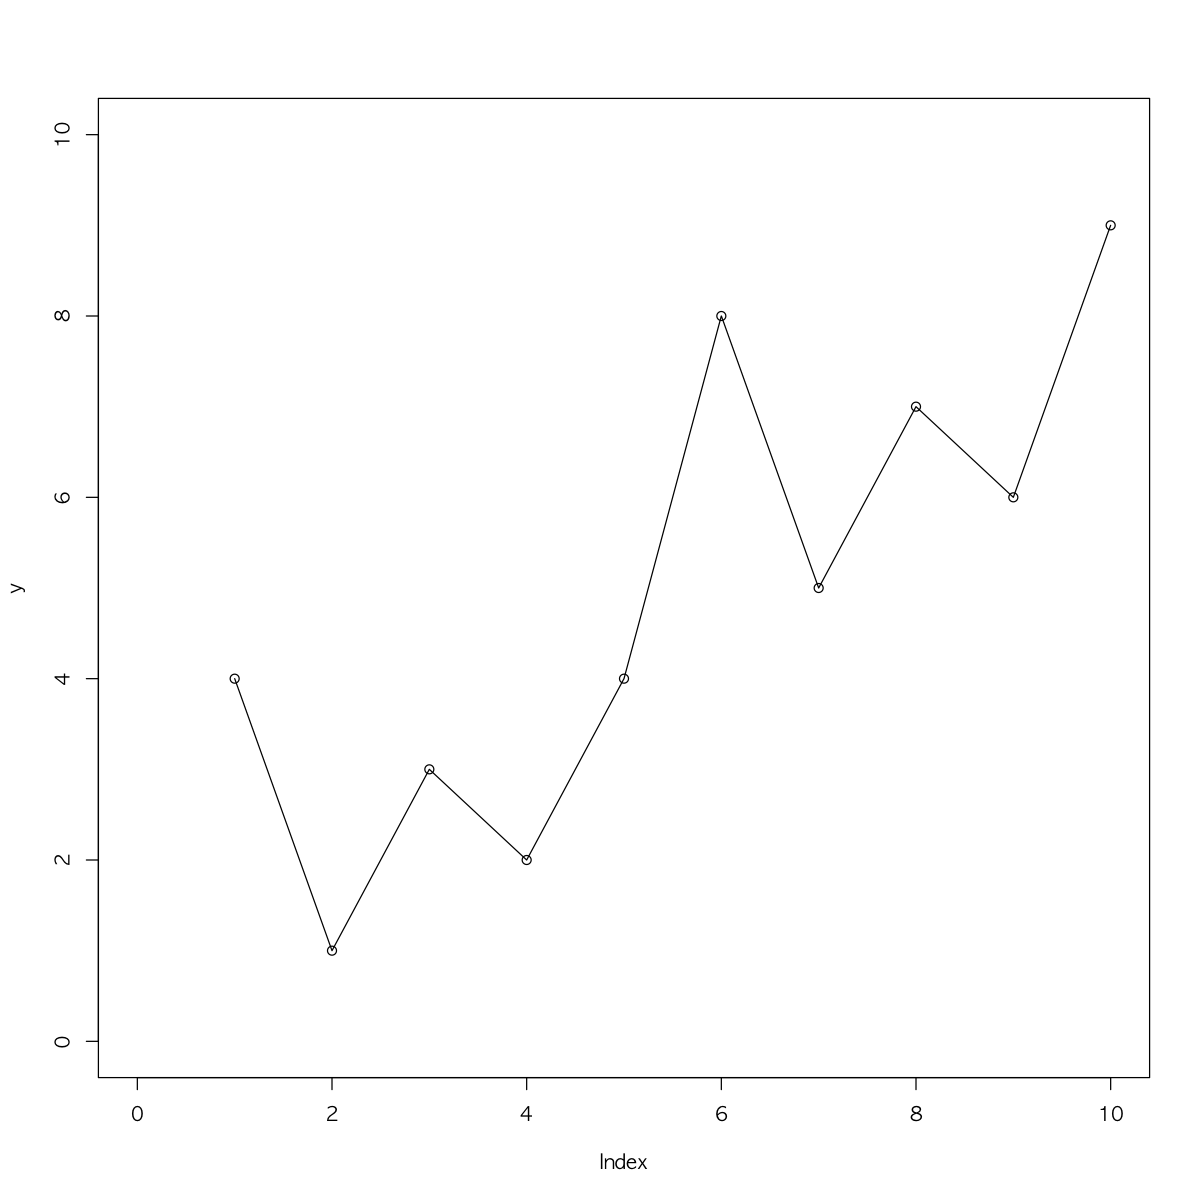

In [17]:
# 점과 꺽은선을 중첩한 그래프
y <- c(4,1,3,2,4,8,5,7,6,9)

myplot<- function(x,y){
        # Author : PDG
        # Date : 2024.03.16
        par(family="AppleGothic" , bg = 'white')
        plot(y,
                xlim= c(min(y)-1, max(y)+1),
                ylim= c(min(y)-1, max(y)+1),
                #type= "l", # 꺽은선
                #type= "h", # horizontal 막대
                #type= "b", # 꺽은 선과 데이터 점
                #type= "c", # 점이 비어있음 ( 수치값 쓸 때 사용)
                #type = "s", # step (잘사용안함. )
                type= "o", # overlap
        )
}
myplot(c(),y)

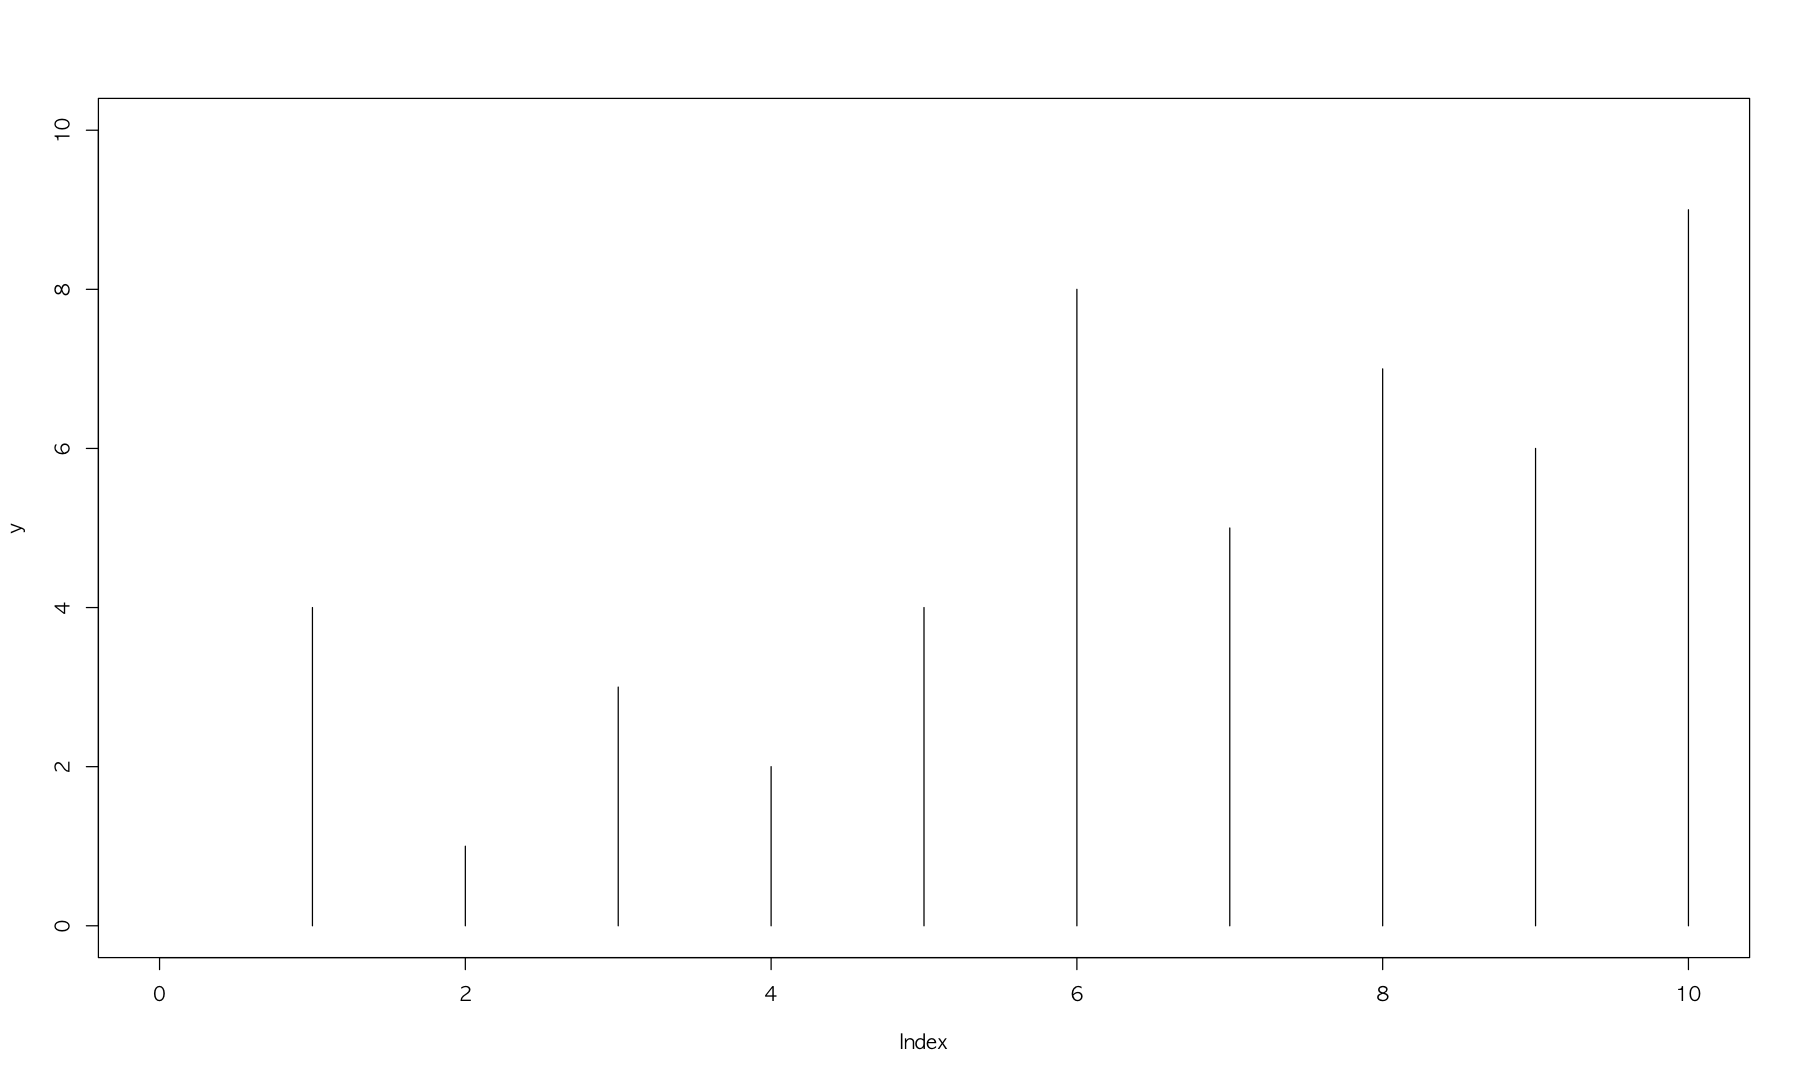

In [ ]:

# 수직선 그래프 like 막대그래프 
par(family="AppleGothic" , bg = 'white')
y <- c(4,1,3,2,4,8,5,7,6,9)
plot(y,
        xlim= c(min(y)-1, max(y)+1),
        ylim= c(min(y)-1, max(y)+1),
        type= "h" #horizontal
        )

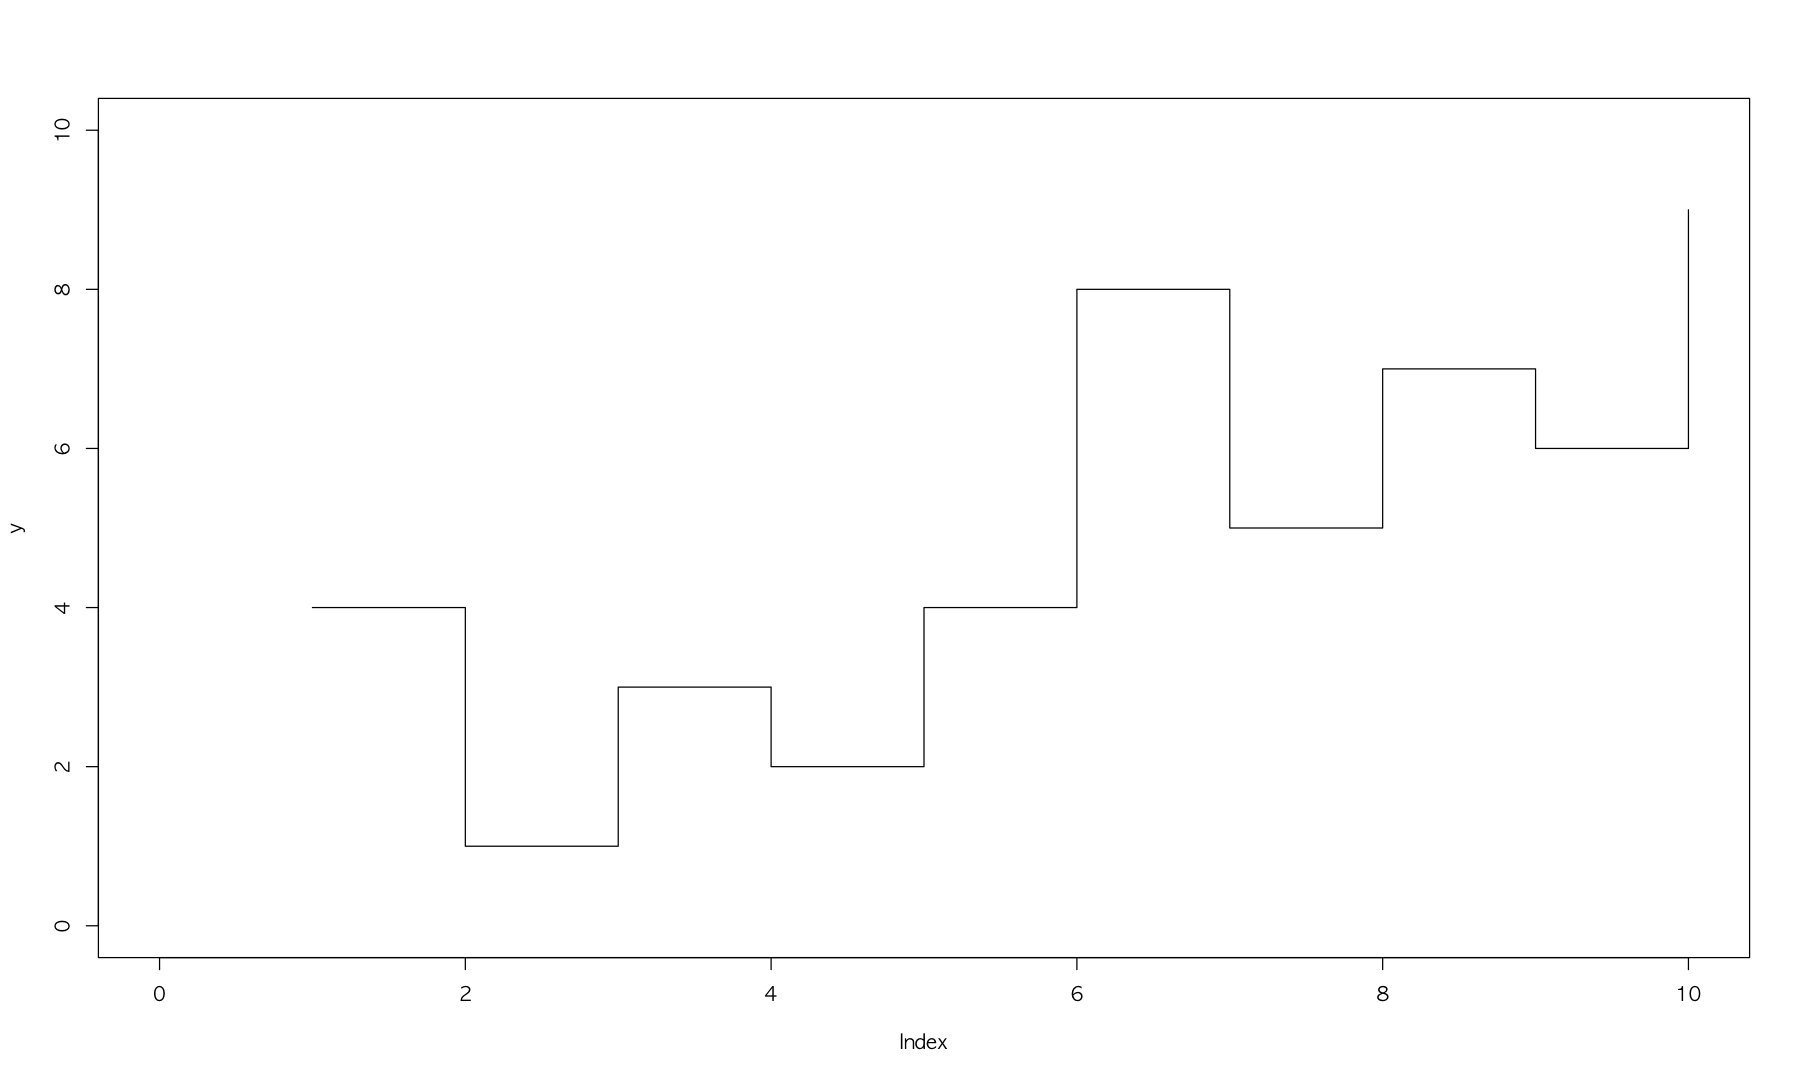

In [ ]:

# r계단 그래프
par(family="AppleGothic" , bg = 'white')
y <- c(4,1,3,2,4,8,5,7,6,9)
plot(y,
        xlim= c(min(y)-1, max(y)+1),
        ylim= c(min(y)-1, max(y)+1),
        type= "s" #step
        )

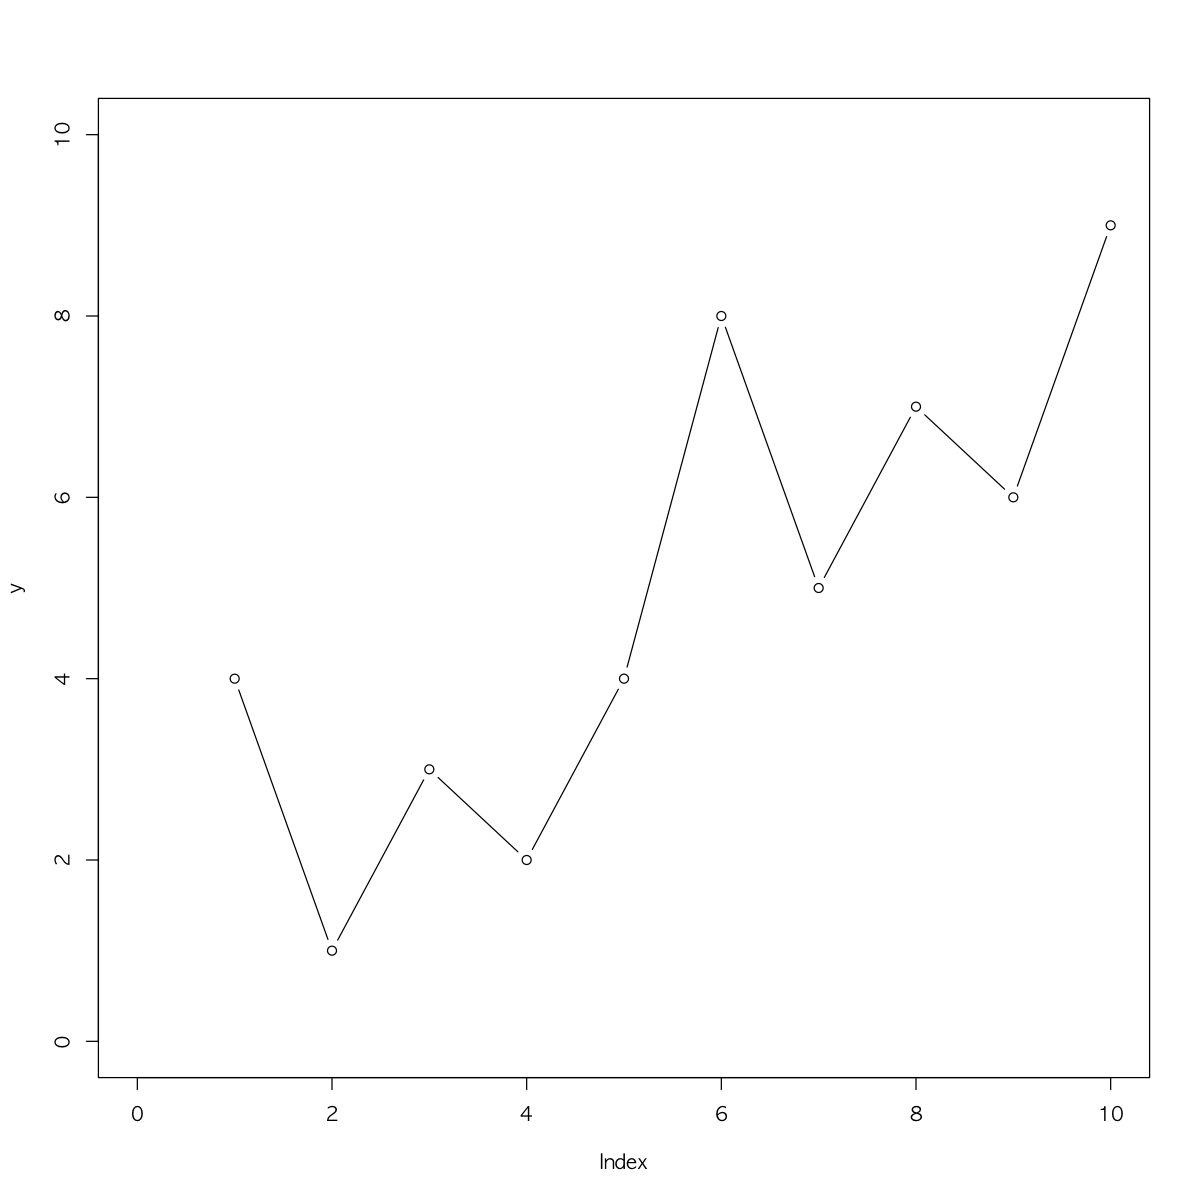

In [23]:

# 수직선 그래프 like 막대그래프 
par(family="AppleGothic" , bg = 'white')
y <- c(4,1,3,2,4,8,5,7,6,9)
myplot<- function(x,y){
        # Author : PDG
        # Date : 2024.03.16
        par(family="AppleGothic" , bg = 'white')
        plot(y,
                xlim= c(min(y)-1, max(y)+1),
                ylim= c(min(y)-1, max(y)+1),
                #type= "l", # 꺽은선
                #type= "h", # horizontal 막대
                #type= "c", # 점이 비어있음 ( 수치값 쓸 때 사용)
                #type= "s", # step (잘사용안함. )
                #type= "o", # overlap
                type= "b", # 꺽은 선과 데이터 점
                
                lty = 7#line type (1~6 직선~ 점선)
        )
}
myplot(c(),y)

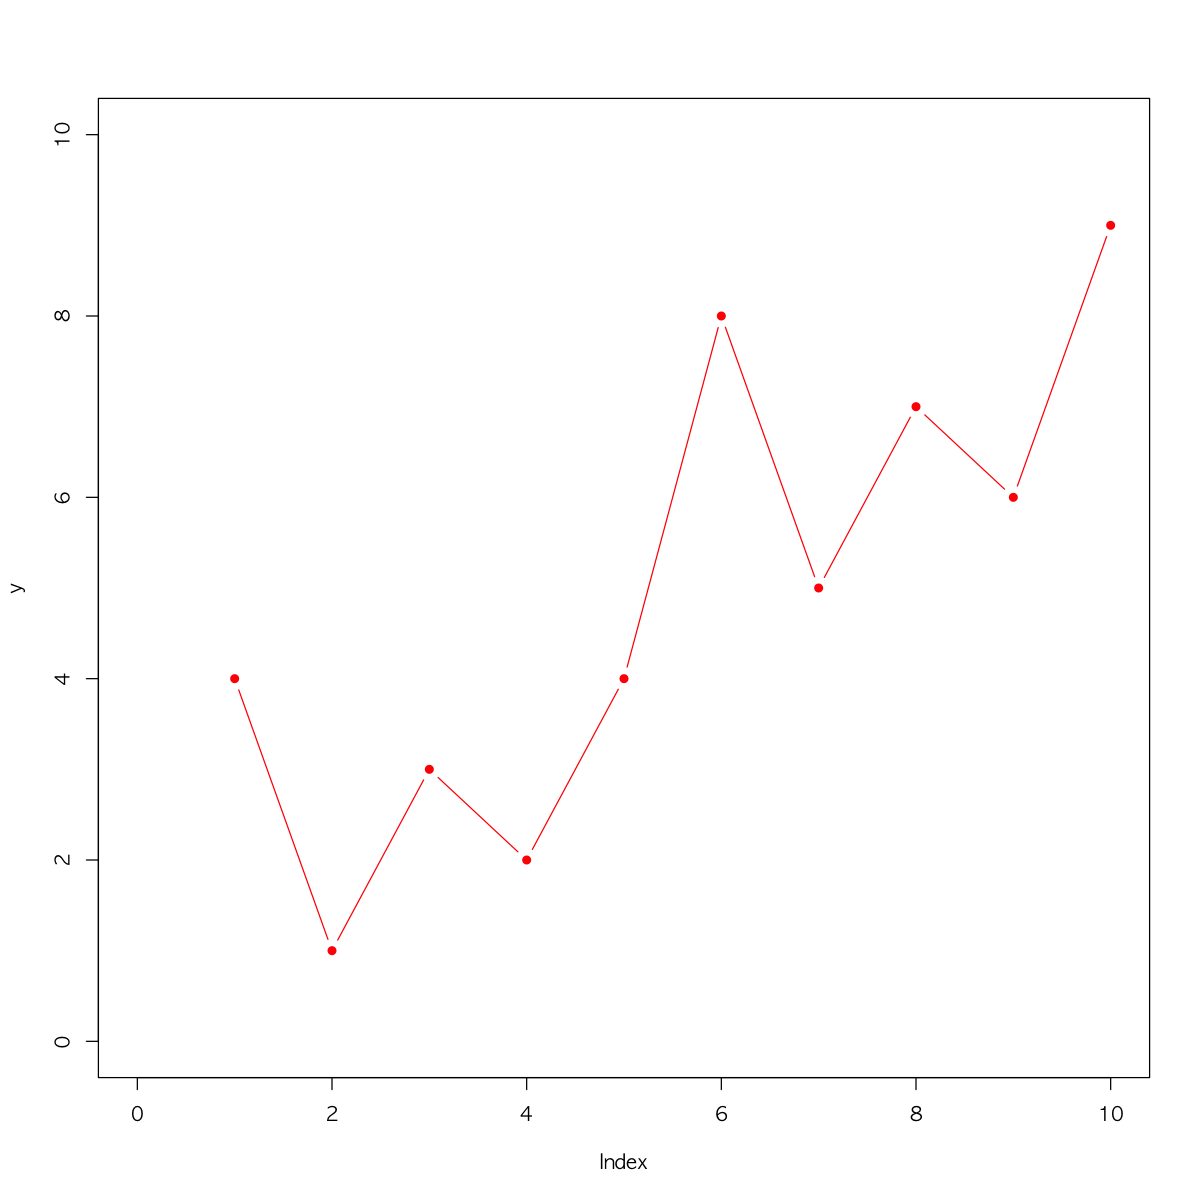

In [27]:

# Plotting symbol 
par(family="AppleGothic" , bg = 'white')
y <- c(4,1,3,2,4,8,5,7,6,9)
myplot<- function(x,y){
        # Author : PDG
        # Date : 2024.03.16
        par(family="AppleGothic" , bg = 'white')
        plot(y,
                xlim= c(min(y)-1, max(y)+1),
                ylim= c(min(y)-1, max(y)+1),
                #type= "l", # 꺽은선
                #type= "h", # horizontal 막대
                #type= "c", # 점이 비어있음 ( 수치값 쓸 때 사용)
                #type= "s", # step (잘사용안함. )
                #type= "o", # overlap
                type= "b", # 꺽은 선과 데이터 점
                lty = 7,#line type (1~6 직선~ 점선)
                pch =16,
                col="red"
        )
}
myplot(c(),y)

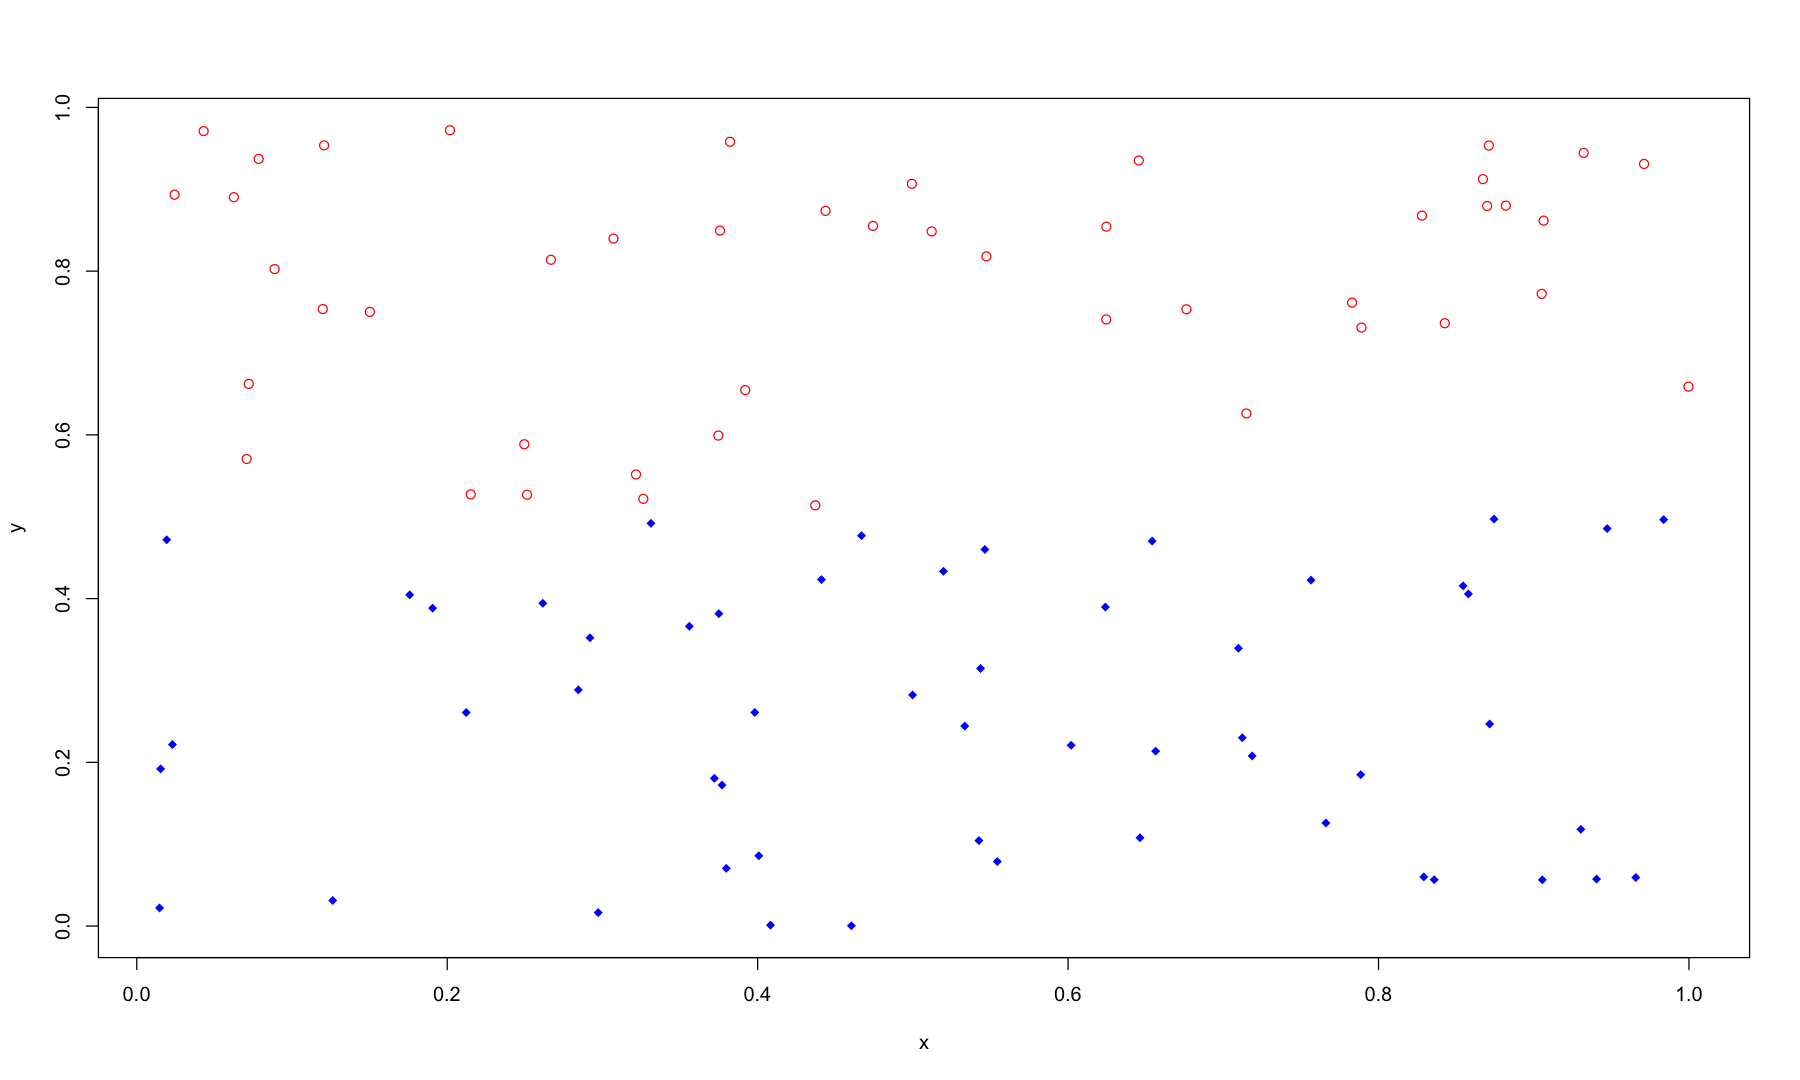

In [ ]:

# 범위별로 색깔과 점 모양 바꾸기
x<-runif(100)
y <- runif(100)
#0.5 기준으로 0.5 보다 크면 pch1, 아니면 pch =18
#0.5 기준으로 0.5 보다 크면 red, 아니면 blue
par( familiy= "applegothic", bg= 'white')
plot(x,y,
    col= ifelse(y>0.5,"red","blue"),
    pch= ifelse(y>0.5, 1,18)
)

# 선그래프

In [ ]:
#3 종류의 선그래프
abc <- c(260,300,250,280,310)
def <- c(180,200,210,190,170)
ghi <- c(210,250,260,210,270)

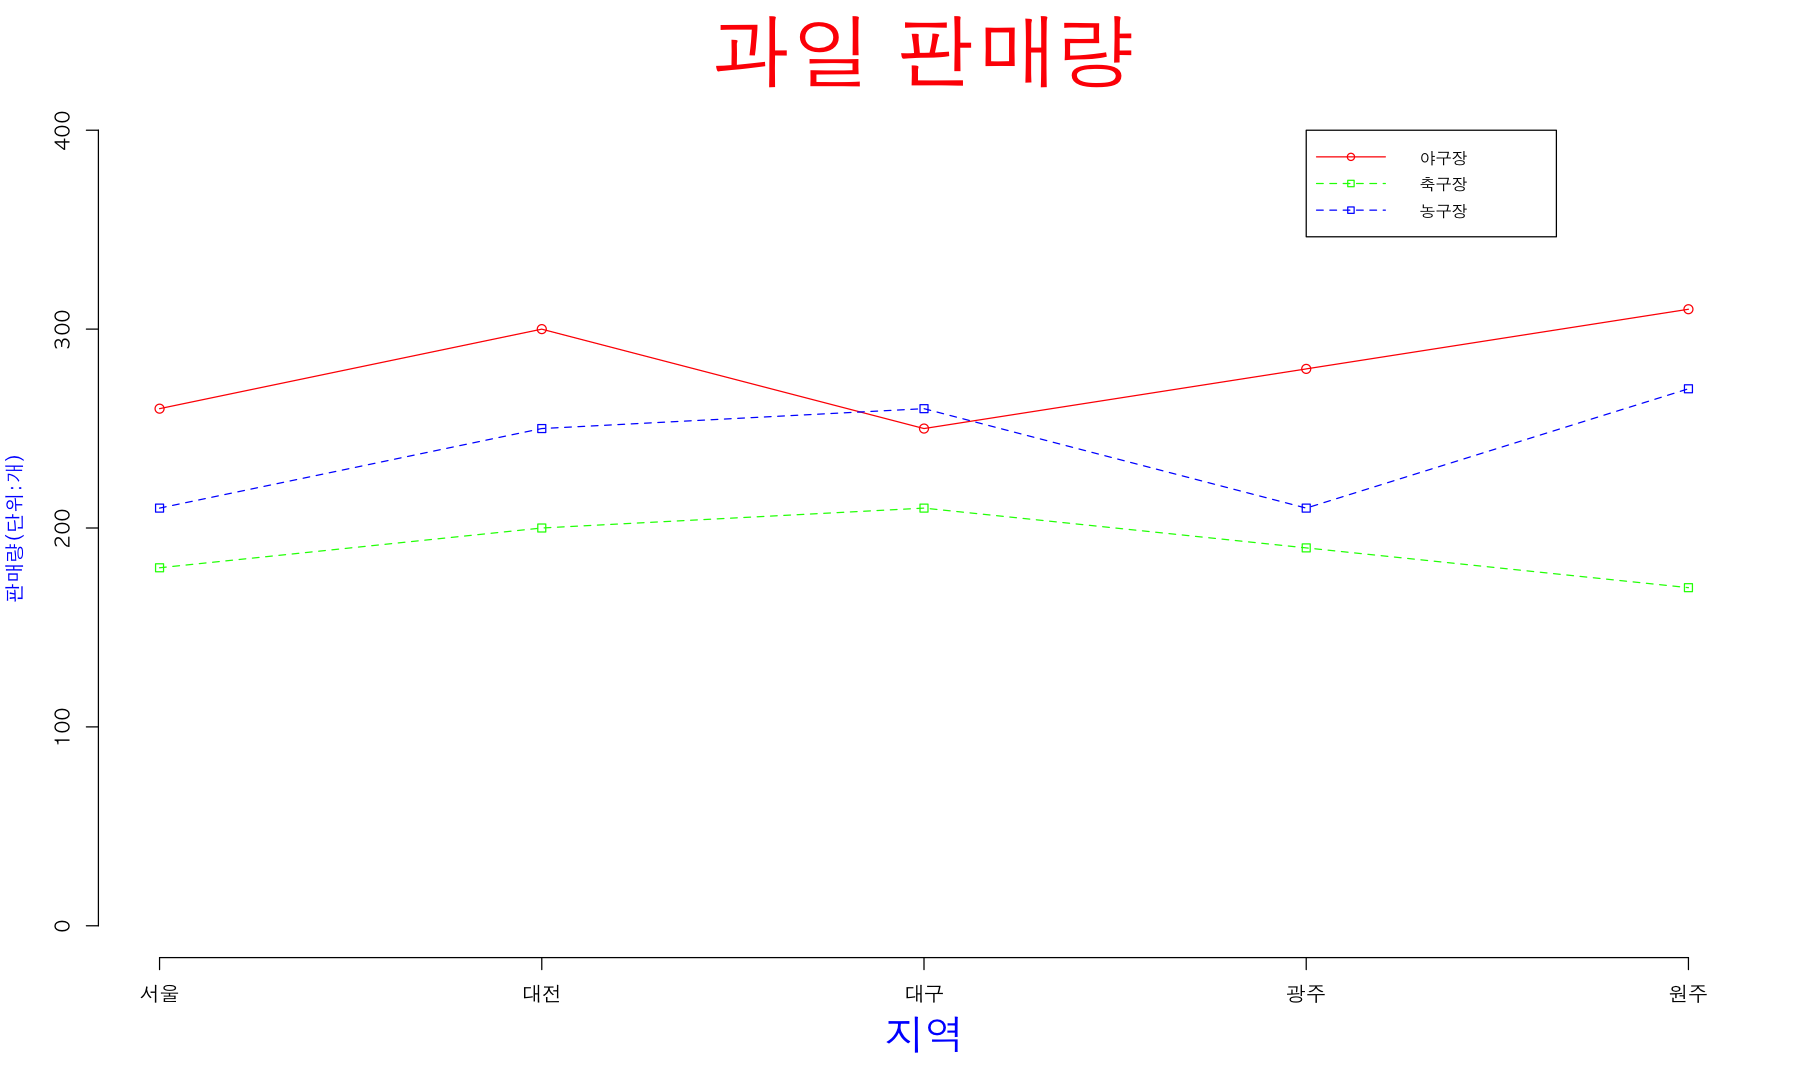

In [ ]:
par(family = "AppleGothic", bg="white")
#dev.new(width=5, height=4)
plot(abc,
    type= "o",
    col = "red",
    axes = F, # x,y 축 제거
    ann = F, # xy label 제거
    ylim =c(0,400)
)
# 라벨설정
axis(1, at = 1:5, lab = c('서울','대전','대구', '광주','원주'))
# y 라벨 설정
axis(2,ylim= c(0,400))

# main title ( color 등 바꾸려면 밖에 써야함. )
title(main= "과일 판매량", col.main= "red", cex.main =4)

#x 축 label 지정
title(xlab = "지역" , col.lab="blue", cex.lab=2)
#y 축 label 지정
title(ylab = "판매량(단위:개)" , col.lab="blue", cex.lab=1)

# 선그리기로 def와 ghi 그리기
lines(def,
    pch = 22,
    type ="o",
    col ='green',
    lty= 2)
lines(ghi,
    pch = 22,
    type ="o",
    col ='blue',
    lty= 2)
#범례
legend(4,400,
    c("야구장", "축구장", "농구장"),
    col= c("red","green","blue"),
    lty = c(1,2,2),
    pch = c(21,22,22),
    cex = 0.8
    #fill=  c("red","green","blue")
)

260 300 250 280 310

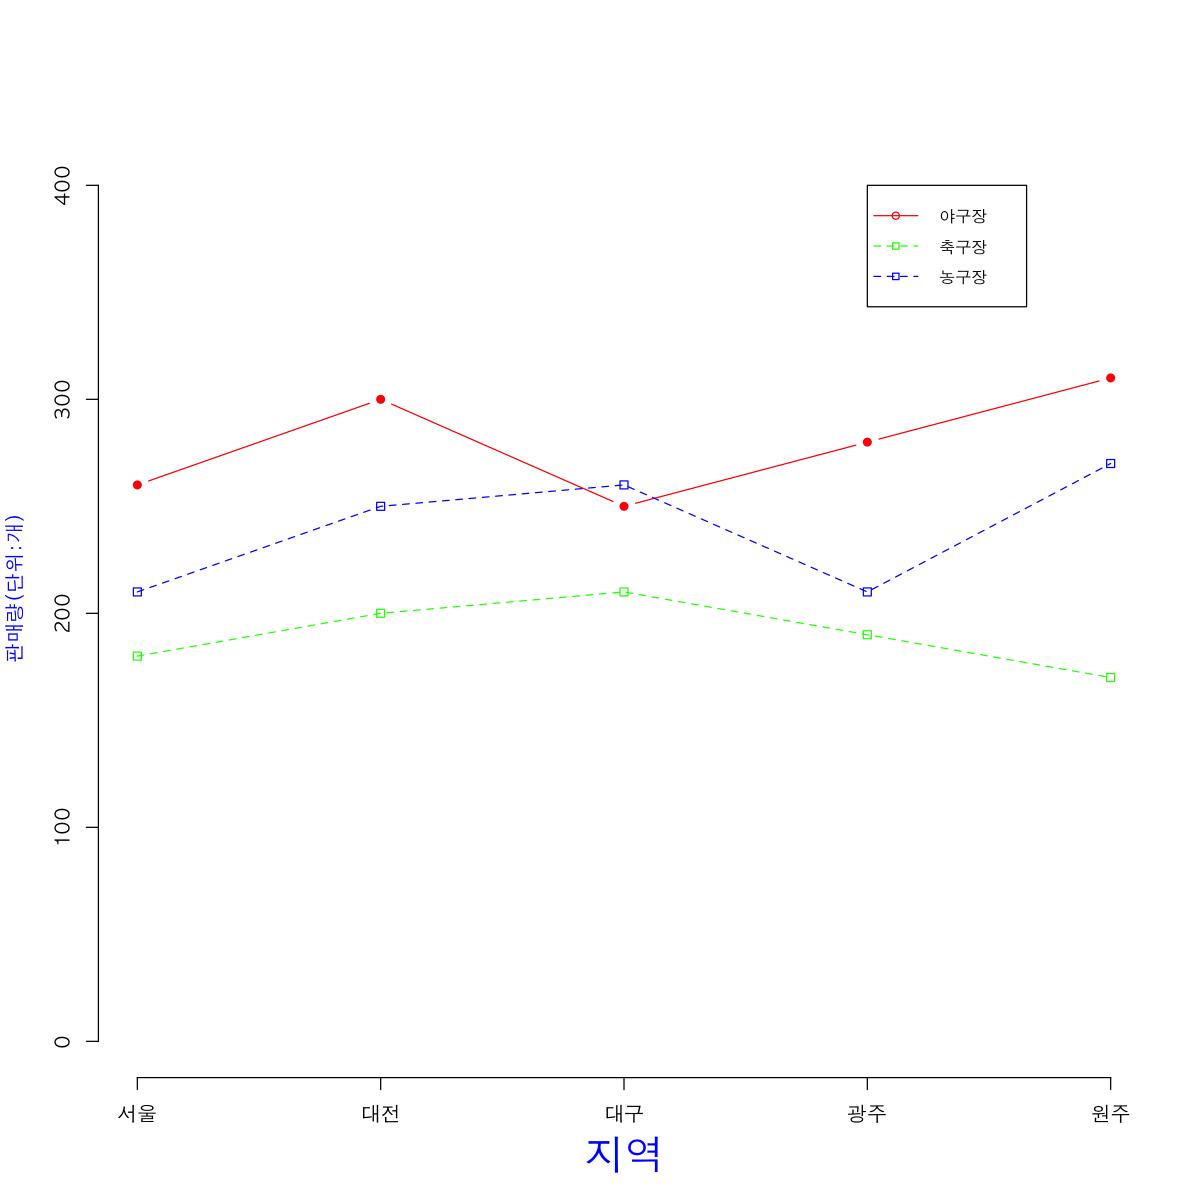

In [50]:

#3 종류의 선그래프
abc <- c(260,300,250,280,310)
def <- c(180,200,210,190,170)
ghi <- c(210,250,260,210,270)
myplot<- function(x,y){
        # Author : PDG
        # Date : 2024.03.16
        cat(y)
        par(family="AppleGothic" , bg = 'white')
        plot(   y, # data
                #xlim= c(min(y)-1, max(y)+1),
                ylim= c(0, max(y)*(410/300)),
                
                type= "b",      # 꺽은 선과 데이터 점
                lty = 7,        #line type (1~6 직선~ 점선)
                pch =16,        # filled circle
		axes = F,       # x,y 축 제거
		ann = F,        # xy label 제거
		col="red",
        )
        # x 라벨설정
        axis(1, at = 1:5, lab = c('서울','대전','대구', '광주','원주'))
        # y 라벨 설정
        axis(2,ylim= c(0,max(y)+1))
        # x 축 label 지정
        title(xlab = "지역" , col.lab="blue", cex.lab=2)
        # y 축 label 지정
        title(ylab = "판매량(단위:개)" , col.lab="blue", cex.lab=1)

        # 선그리기로 def와 ghi 그리기
        lines(  def,
                pch = 22,
                type ="o",
                col ='green',
                lty= 2)
        lines(  ghi,
                pch = 22,
                type ="o",
                col ='blue',
                lty= 2)
        #범례
        legend(4,400,
                c("야구장", "축구장", "농구장"),
                col= c("red","green","blue"),
                lty = c(1,2,2),
                pch = c(21,22,22),
                cex = 0.8
                #fill=  c("red","green","blue")
        )
        
}

myplot(c(),abc)

# 막대그래프

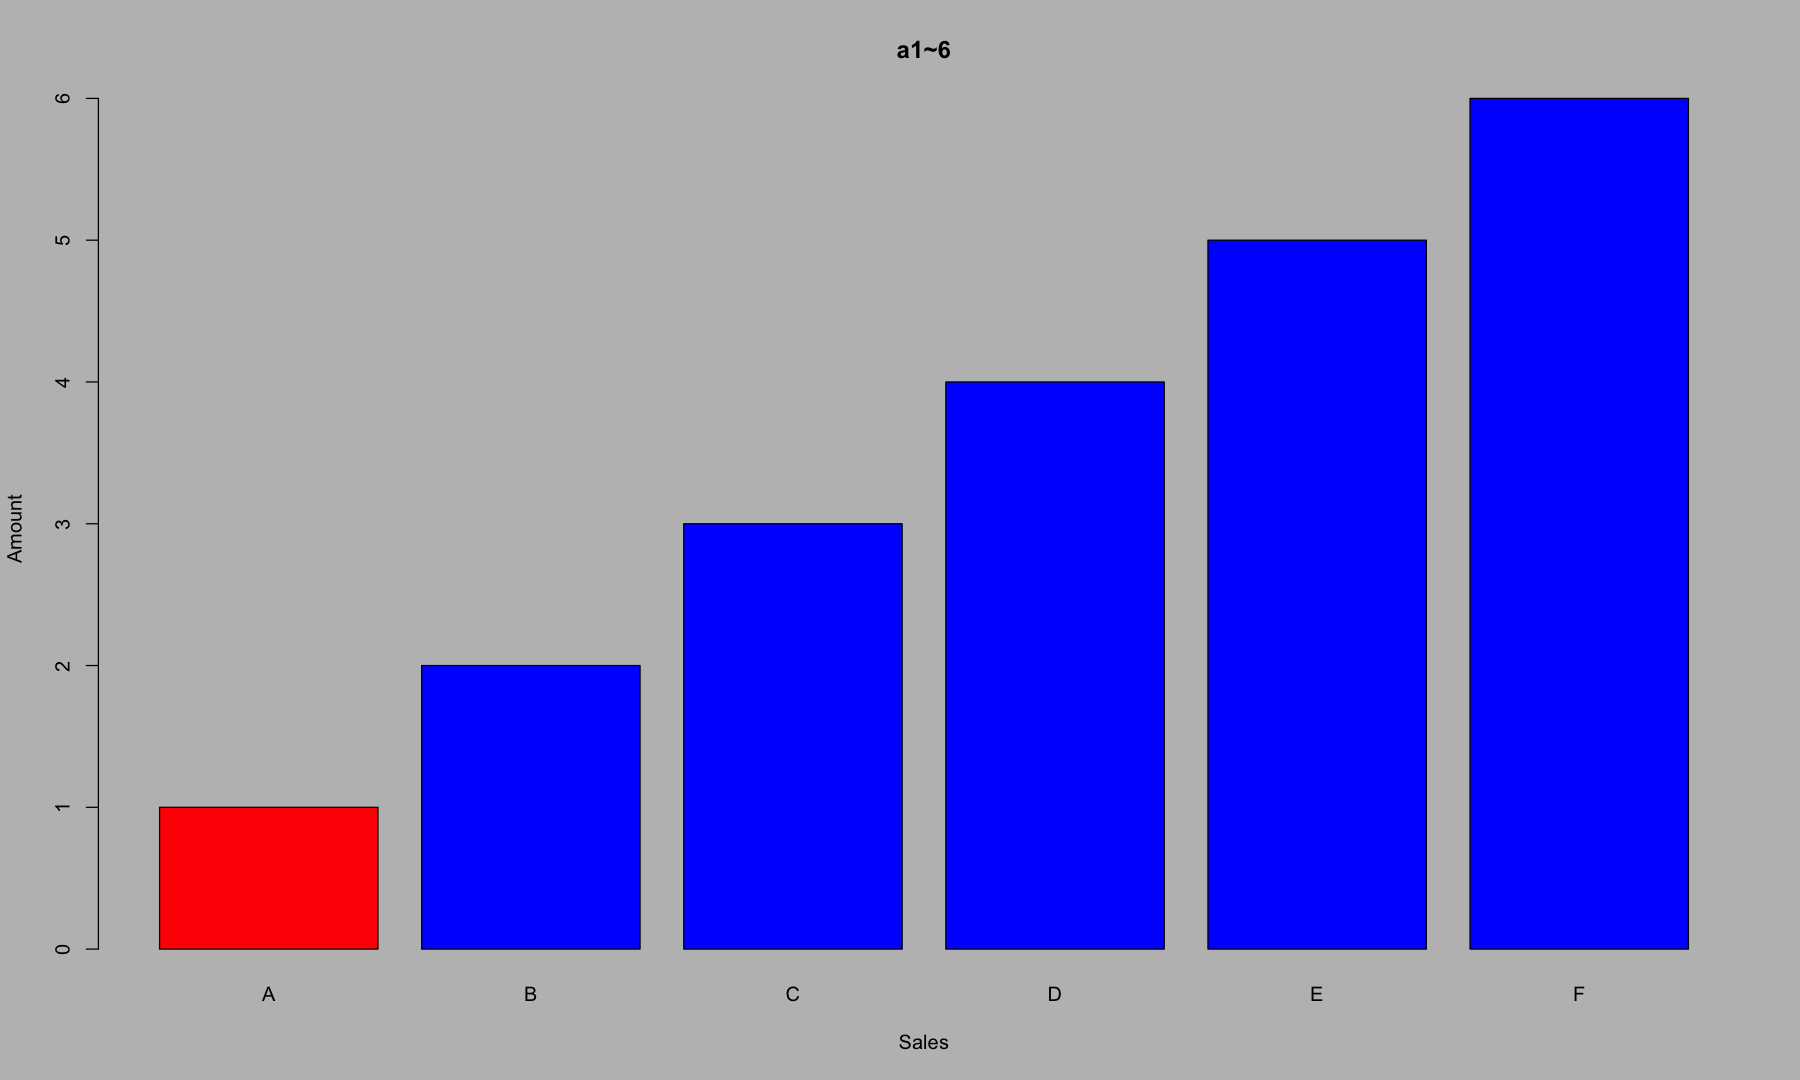

In [ ]:
x<- 1:6
par(bg="grey")
names(x) <- c('A','B','C','D','E','F')
barplot(x,
    main = "a1~6",
    xlab ="Sales",
    ylab ="Amount",
    col = c("red",rep("blue",5))

)

In [ ]:
# matrix
x <- matrix(1:6,3,2)
x

1,4
2,5
3,6


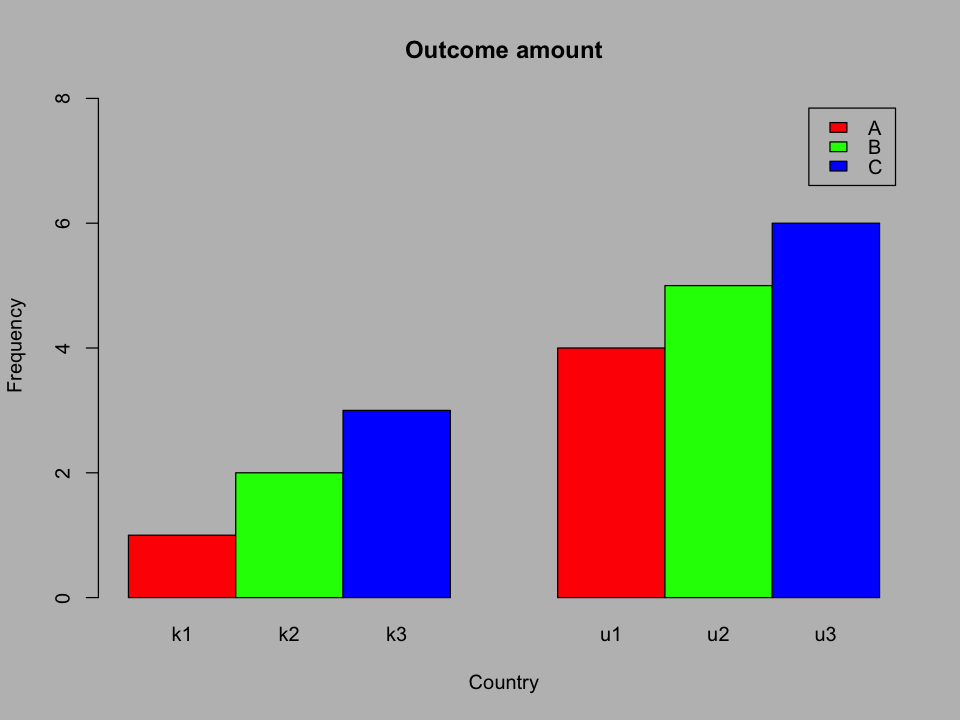

In [ ]:
par( bg= 'grey')
options(repr.plot.width=8, repr.plot.height=6) 
rownames(x)<- c("A",'B','C')
barplot(x,
        beside =T,
        main = "Outcome amount",
        xlab = "Country",
        ylab = " Frequency",
        #names = c('Korea','USA')
        names = c("k1",'k2','k3','u1','u2','u3'),
        col = c('red','green','blue'),#, 'black','white','yellow'),
        legend.text = T,
        ylim = c(0,8)
        )


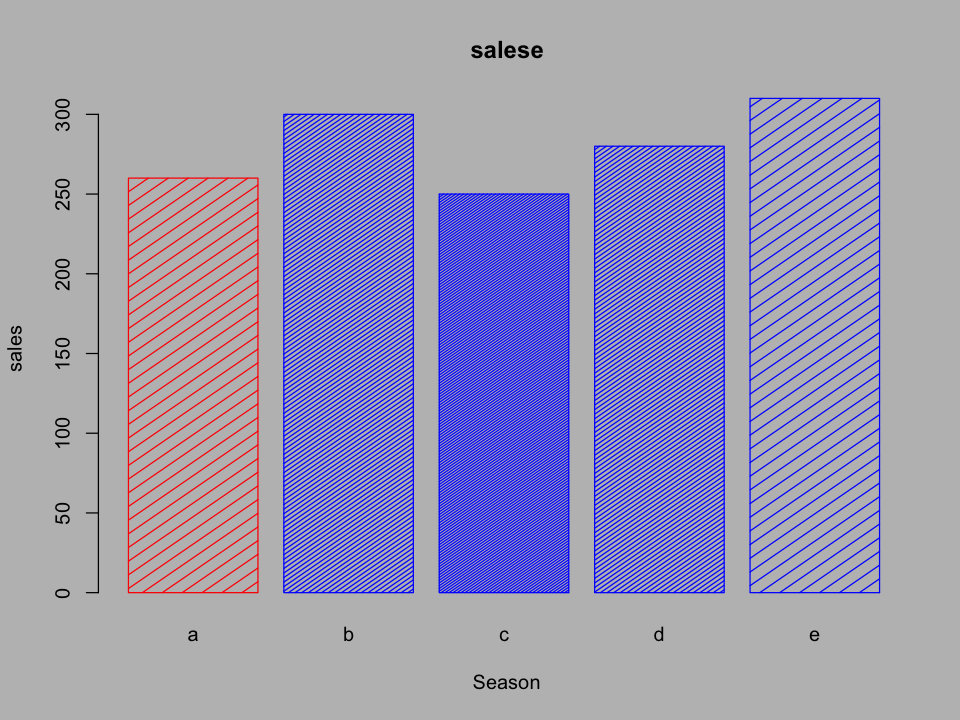

In [ ]:

par( bg ='grey')
barplot(abc,

    main =" salese",
    xlab =" Season",
    ylab = "sales",
    names = c('a','b','c','d','e'),
    col = c('red',rep('blue',length(abc)-1)),
    border = c('red',rep('blue',length(abc)-1)),# chart 경계선 똑같이 맞추어줌
    density = c(10,30,50,30,10), # 막대 내부 빗금. 
)

In [ ]:
# 학력별 점수 차이
data<- read.csv("../Data/education.csv", header =F)
head(data)

,V1,V2,V3,V4
,<int>,<int>,<int>,<int>
1,1,88,1,1
2,1,89,2,2
3,1,90,3,3
4,1,90,1,4
5,1,90,2,5
6,1,90,3,1


In [ ]:
# V1 : 남, 여
# V2 : 점수
# V3 : 국어 영어 수학
# V4 : 초, 중, 고, 대 , 원 (졸업 학력)



In [ ]:
# Data check 
table(data$V1)
table(data$V2)
table(data$V3)
table(data$V4)



 1  2 
25 23 


71 72 88 89 90 92 95 
 1  7  9  8  4 10  9 


 1  2  3 
16 16 16 


 1  2  3  4  5 
10 10 10  9  9 

In [ ]:
# Factoring 을 해야함. 
data$V1 <-factor(data$V1, levels = 1:2, labels =c("남","여"))
data$V3 <-factor(data$V3, levels = 1:3, labels =c("국어","영어","수학"))
data$V4 <-factor(data$V4, levels = 1:5, labels =c("초","중","고","대","원"))

In [ ]:
head(data)

,V1,V2,V3,V4
,<fct>,<int>,<fct>,<fct>
1,남,88,국어,초
2,남,89,영어,중
3,남,90,수학,고
4,남,90,국어,대
5,남,90,영어,원
6,남,90,수학,초


In [ ]:
colnames(data) <- c('성별','점수','과목','학력')
head(data)

,성별,점수,과목,학력
,<fct>,<int>,<fct>,<fct>
1,남,88,국어,초
2,남,89,영어,중
3,남,90,수학,고
4,남,90,국어,대
5,남,90,영어,원
6,남,90,수학,초



71 72 88 89 90 92 95 
 1  7  9  8  4 10  9 

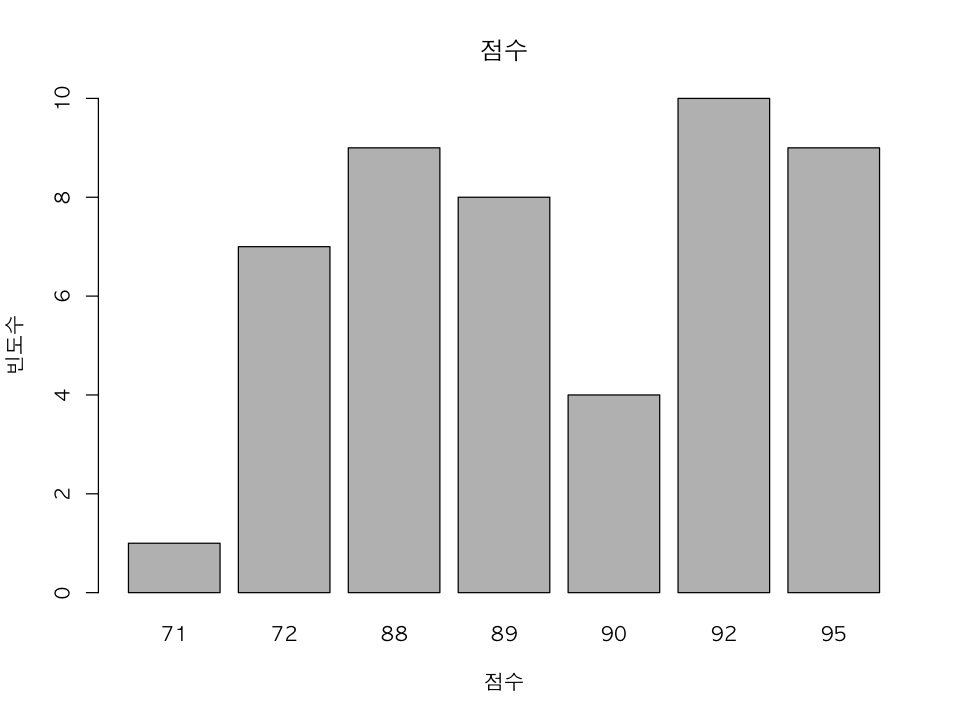

In [ ]:
# 학력별 점수분포 ( 빈도수 이야기..)
table(data$점수)
# barplot 은 vector, matrix, table 이랑 친하고 dataframe 은 모른다. df -> as.matrix 로 해주어야함. 
par(family = 'AppleGothic' ,bg= 'white')
barplot(table(data$`점수`),

    main= "점수",
    xlab = "점수",
    ylab =" 빈도수",
)


남 여 
25 23 


초 중 고 대 원 
10 10 10  9  9 

    
     초 중 고 대 원
  남  5  5  5  5  5
  여  5  5  5  4  4

    
     남 여
  초  5  5
  중  5  5
  고  5  5
  대  5  4
  원  5  4

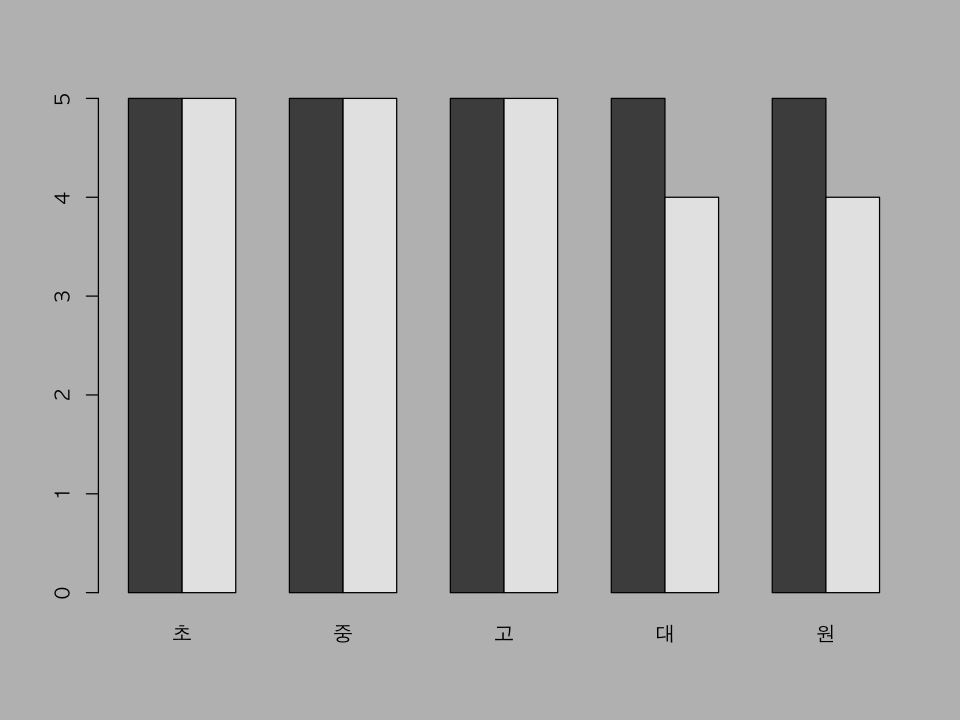

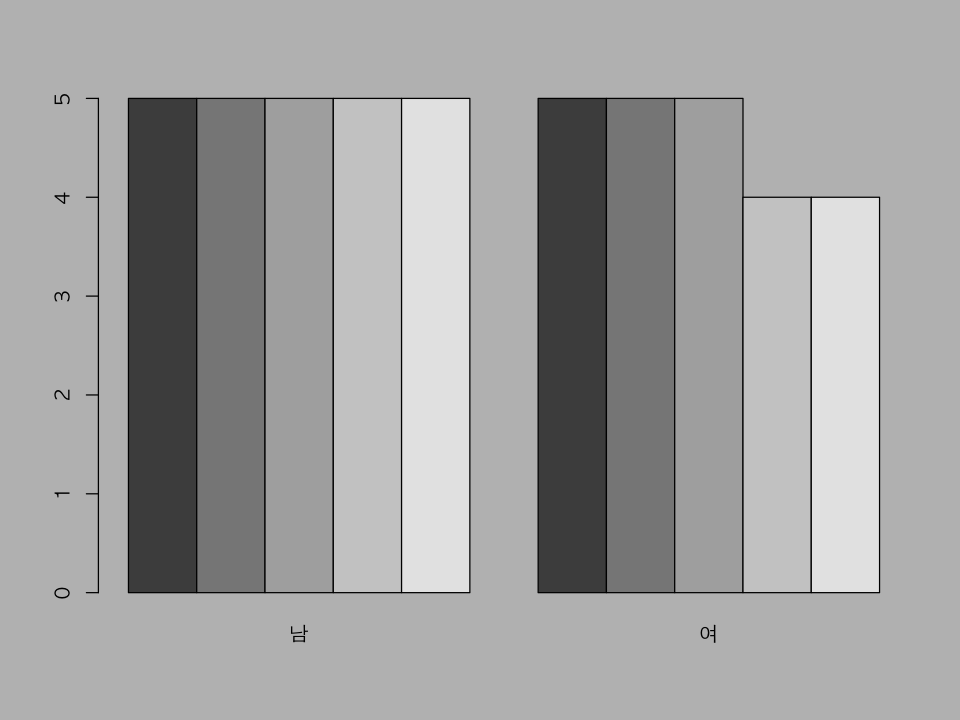

In [ ]:
par(family= 'AppleGothic', bg= 'grey')

# 성별 학력 빈도수를 표현
table(data$`성별`)
table(data$`학력`)
table(data$`성별`, data$`학력`)
barplot(table(data$`성별`, data$`학력`), 
        beside = T,
        )

# 학력별 성 빈도수
table(data$`학력`, data$`성별`)
barplot(table(data$`학력`, data$`성별`), 
        beside = T,
        )


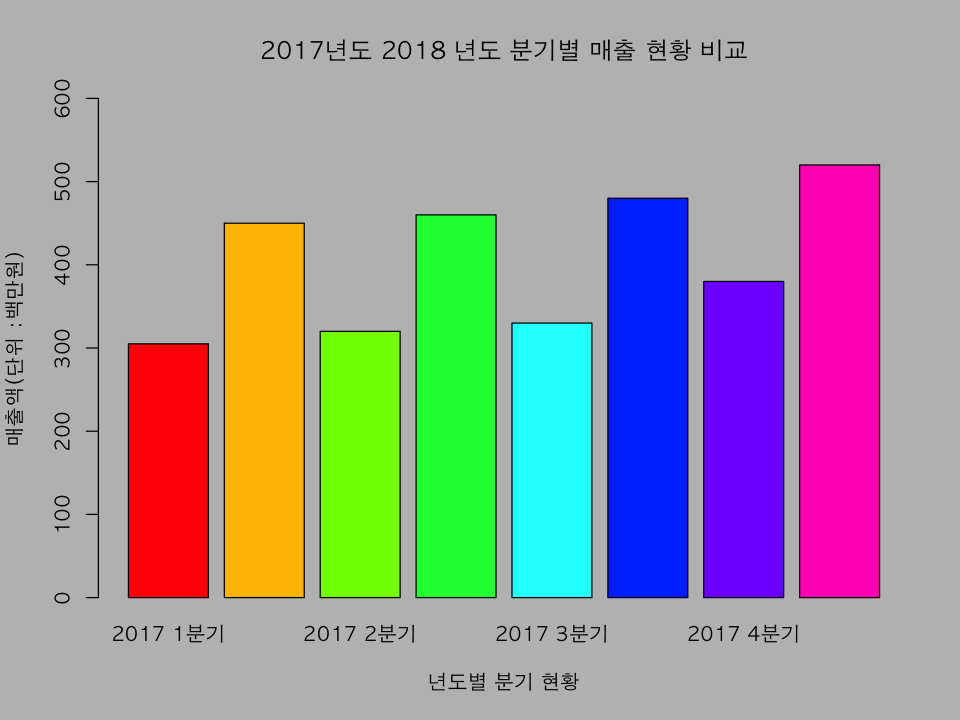

In [ ]:
chart_data <- c(305,450,320,460,330,480,380,520) # 분기별 실적
names(chart_data) <-c(  '2017 1분기', '2018 1분기',
                        '2017 2분기', '2018 2분기',
                        '2017 3분기', '2018 3분기',
                        '2017 4분기', '2018 4분기'
)
par(family= 'AppleGothic', bg ="grey")
barplot(chart_data,
        main= '2017년도 2018 년도 분기별 매출 현황 비교',
        ylim =c(0,600),
        col = rainbow(length(chart_data)),
        xlab = '년도별 분기 현황',
        ylab = '매출액(단위 :백만원)'
)


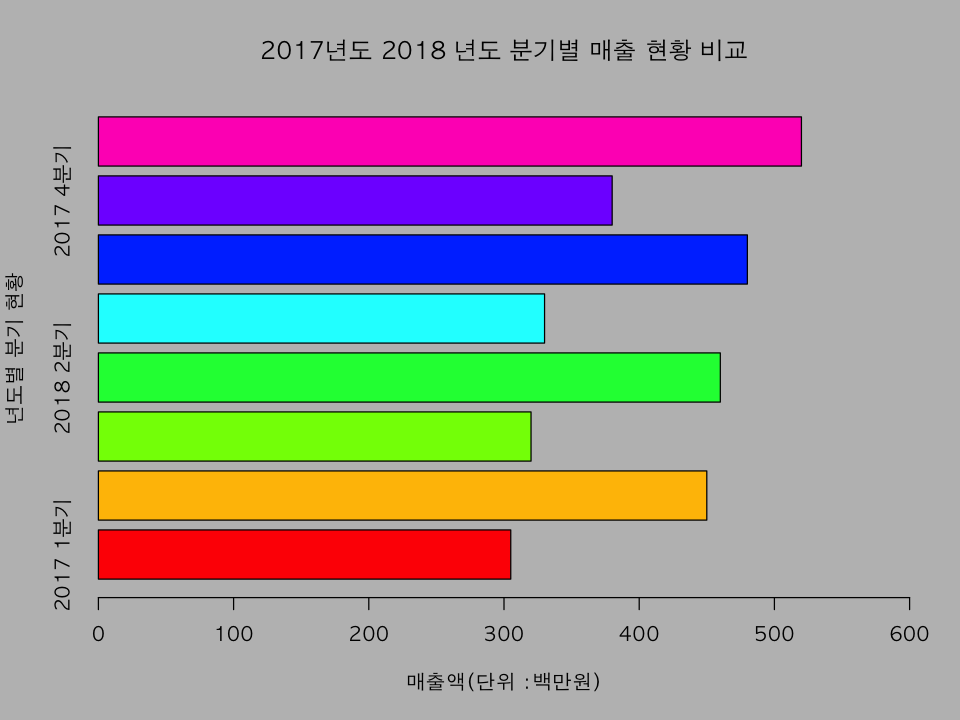

In [ ]:
chart_data <- c(305,450,320,460,330,480,380,520) # 분기별 실적
names(chart_data) <-c(  '2017 1분기', '2018 1분기',
                        '2017 2분기', '2018 2분기',
                        '2017 3분기', '2018 3분기',
                        '2017 4분기', '2018 4분기'
)
par(family= 'AppleGothic', bg ="grey")
barplot(chart_data,
        main= '2017년도 2018 년도 분기별 매출 현황 비교',
        xlim =c(0,600),
        col = rainbow(length(chart_data)),
        xlab = '매출액(단위 :백만원)',
        ylab = '년도별 분기 현황',
        horiz =T, # 그래프 돌려줌. 돌릴때는 다른 설정도 다 돌려야한다. 
        


)


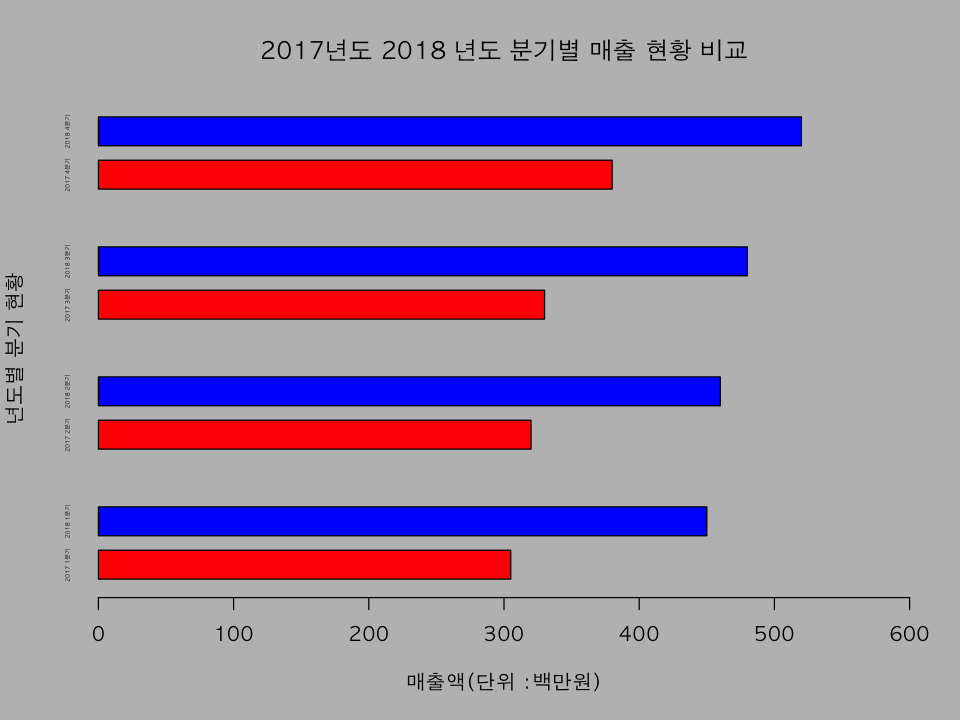

In [ ]:
chart_data <- c(305,450,320,460,330,480,380,520) # 분기별 실적
names(chart_data) <-c(  '2017 1분기', '2018 1분기',
                        '2017 2분기', '2018 2분기',
                        '2017 3분기', '2018 3분기',
                        '2017 4분기', '2018 4분기'
)
par(family= 'AppleGothic', bg ="grey")
barplot(chart_data,
        main= '2017년도 2018 년도 분기별 매출 현황 비교',
        xlim =c(0,600),
        col = rep(c('red','blue'),4),
        xlab = '매출액(단위 :백만원)',
        ylab = '년도별 분기 현황',
        horiz =T, # 그래프 돌려줌. 돌릴때는 다른 설정도 다 돌려야한다. 
        # 분기별로 간격을 주고싶다. 
        space = rep(c(2,0.5),4), # r은 다 벡터니까 분기별로 간격을 띄우려면 이렇게 ..
        cex.names=0.3
)


In [ ]:
#1940년 미국 버지니아주 하위계층 사망 비율
data(VADeaths)
class(VADeaths)
str(VADeaths)
data<-as.data.frame(VADeaths)

[1] "matrix" "array"

 num [1:5, 1:4] 11.7 18.1 26.9 41 66 8.7 11.7 20.3 30.9 54.3 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:5] "50-54" "55-59" "60-64" "65-69" ...
  ..$ : chr [1:4] "Rural Male" "Rural Female" "Urban Male" "Urban Female"


,Rural Male,Rural Female,Urban Male,Urban Female
,<dbl>,<dbl>,<dbl>,<dbl>
50-54,11.7,8.7,15.4,8.4
55-59,18.1,11.7,24.3,13.6
60-64,26.9,20.3,37.0,19.3
65-69,41.0,30.9,54.6,35.1
70-74,66.0,54.3,71.1,50.0


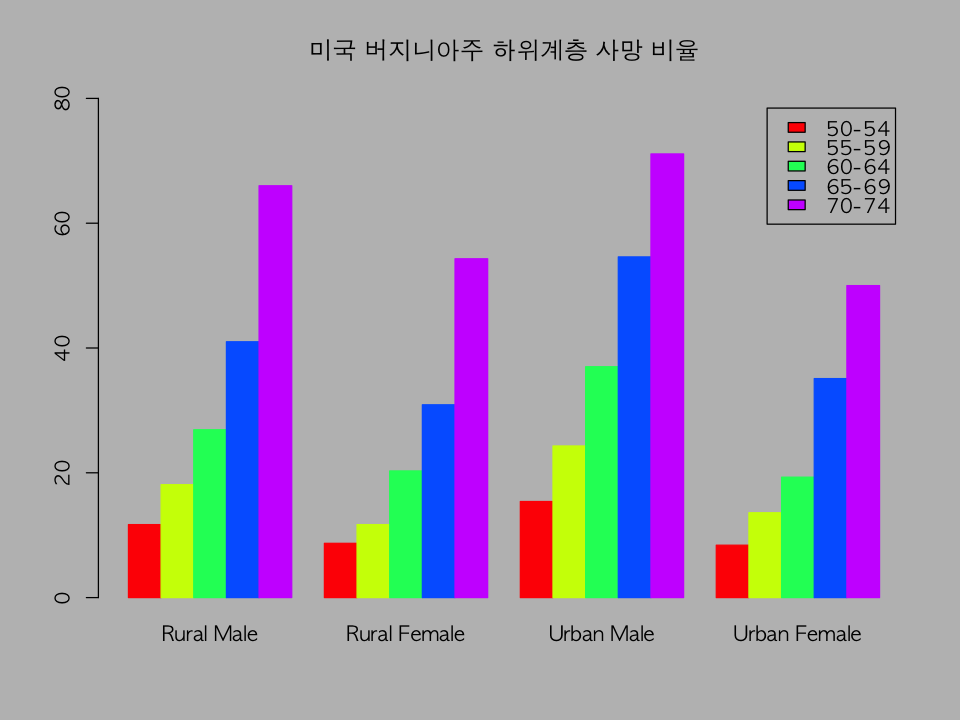

In [ ]:
        #도심, 지역별 나이별 차트 
        data


        par(bg ='grey', family = 'AppleGothic')
        barplot(VADeaths,
                main = "미국 버지니아주 하위계층 사망 비율",
                beside=T,
                col = rep(rainbow(length(data$`Rural Male`)),length(data)),
                border =  rep(rainbow(length(data$`Rural Male`)),length(data)),
                legend.text =T,
                ylim = c(0,80)
                #legend(names(data))
                )
        # 그림을 가지고 거꾸로 테이블을 생각할줄 알아야한다. 


,Rural Male,Rural Female,Urban Male,Urban Female
,<dbl>,<dbl>,<dbl>,<dbl>
50-54,11.7,8.7,15.4,8.4
55-59,18.1,11.7,24.3,13.6
60-64,26.9,20.3,37.0,19.3
65-69,41.0,30.9,54.6,35.1
70-74,66.0,54.3,71.1,50.0


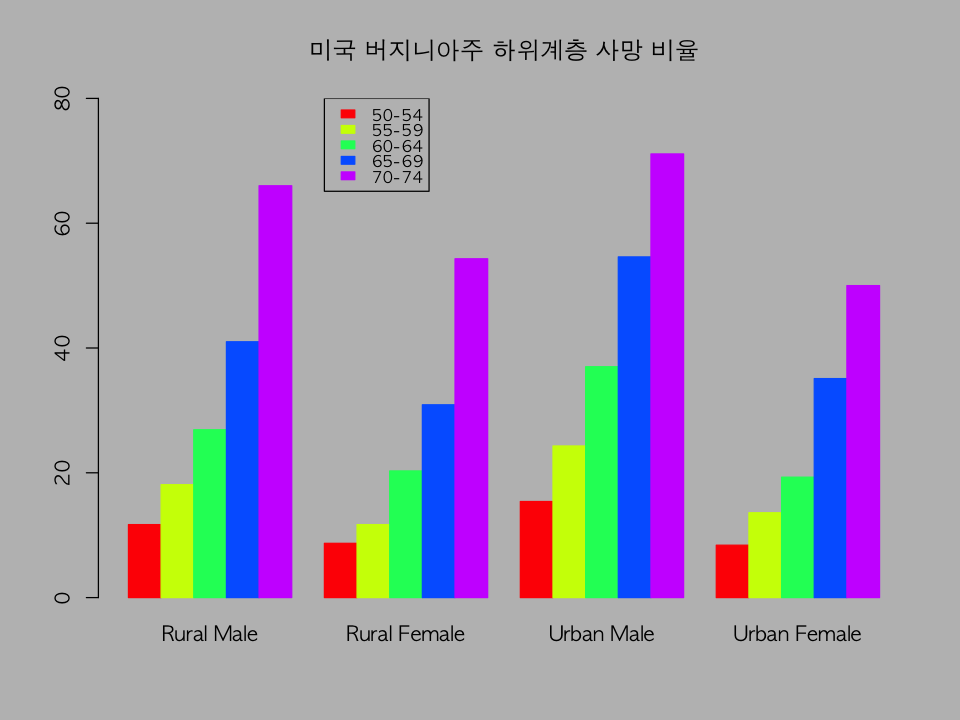

In [ ]:
#도심, 지역별 나이별 차트 
data


par(bg ='grey', family = 'AppleGothic')
barplot(VADeaths,
        main = "미국 버지니아주 하위계층 사망 비율",
        beside=T,
        col = rep(rainbow(length(data$`Rural Male`)),length(data)),
        border =  rep(rainbow(length(data$`Rural Male`)),length(data)),
        #legend.text =T,
        ylim = c(0,80),
        
        )
# 그림을 가지고 거꾸로 테이블을 생각할줄 알아야한다. 
legend(7,80,
        rownames(data),
        fill =rainbow(length(rownames(data))),
        border=rainbow(length(rownames(data))),
        cex =0.8
        )


2017 1분기 2018 1분기 2017 2분기 2018 2분기 2017 3분기 2018 3분기 2017 4분기 
       305        450        320        460        330        480        380 
2018 4분기 
       520

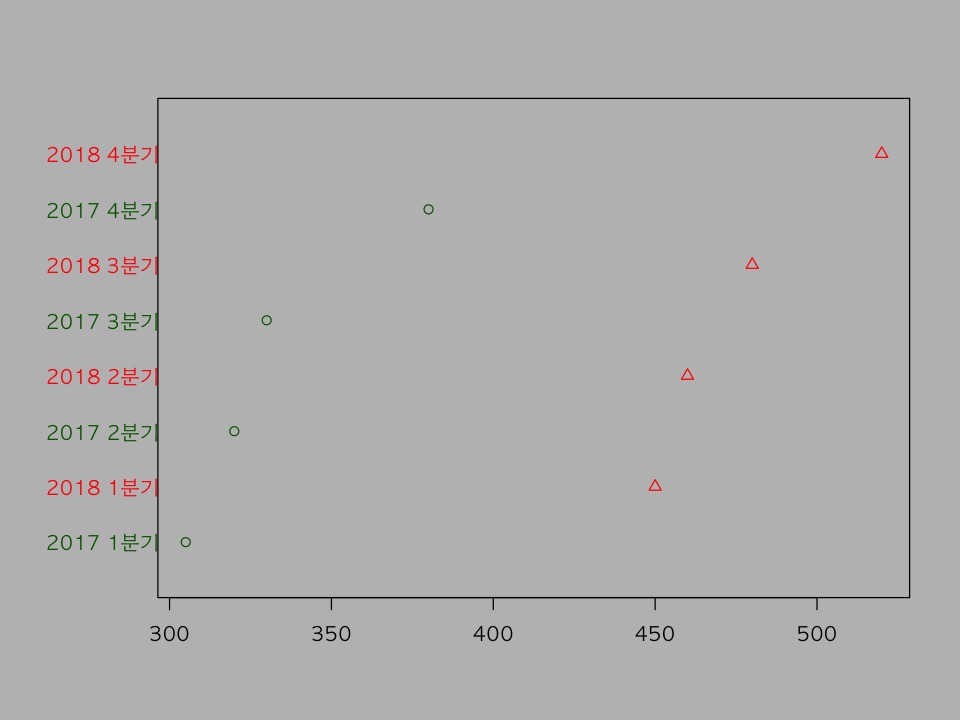

In [ ]:
# 점차트 
chart_data
par(family = 'AppleGothic', bg = 'grey')
dotchart(chart_data,
    color =rep(c('darkgreen','red')),
    pch =1:2
)


# 파이차트



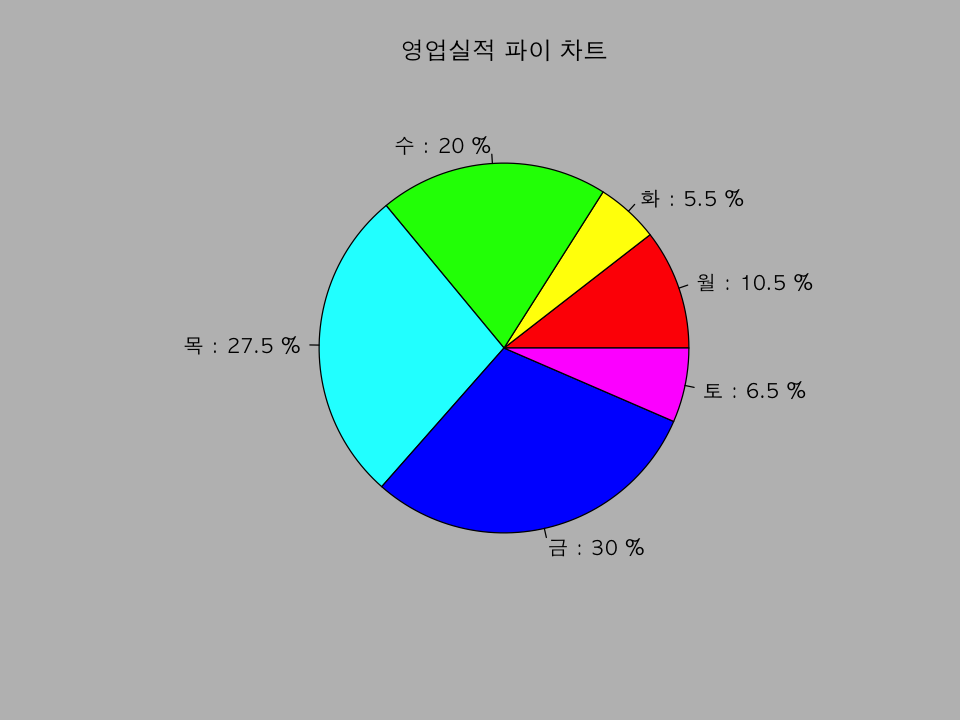

In [ ]:
par(bg = 'grey', family = 'AppleGothic')

sales <- c(210,110,400,550,600,130)
week  <- c('월','화','수','목','금','토')
# 파이차트는 퍼센트를 보여주는것이다. 라벨에 모든것이 다들어가는데 다 벡터로 넣ㄴ느다.
ratio <- sales /sum(sales)*100
#label <- paste(week,"\n",ratio, '%')
label <- paste(week,":",ratio, '%')
pie(sales,
    main = '영업실적 파이 차트',
    col = rainbow(length(sales)),
    labels =label

)

In [ ]:
# 3D pie chart
#install.packages("plotrix")
#library(plotrix)

In [ ]:
library(plotrix)


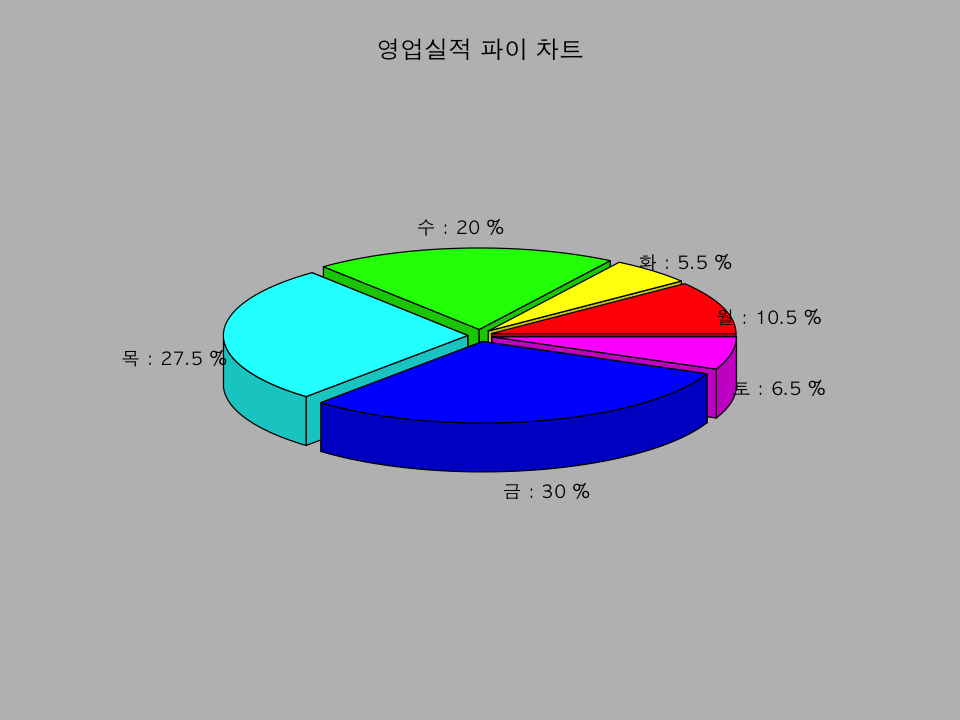

In [ ]:
par(bg = 'grey', family = 'AppleGothic')

sales <- c(210,110,400,550,600,130)
week  <- c('월','화','수','목','금','토')
# 파이차트는 퍼센트를 보여주는것이다. 라벨에 모든것이 다들어가는데 다 벡터로 넣ㄴ느다.
ratio <- sales /sum(sales)*100
#label <- paste(week,"\n",ratio, '%')
label <- paste(week,":",ratio, '%')
pie3D(sales,
    main = '영업실적 파이 차트',
    col = rainbow(length(sales)),
    labels =label,
    explode =0.05,
    labelcex =0.9

)